Pobierz dane

In [31]:
import os
import wfdb

# Ścieżka do katalogu z bazą
data_dir = '../data/raw/mit-bih-arrhythmia-database'

# Sprawdź, czy baza danych jest już pobrana
if not os.path.exists(data_dir) or len(os.listdir(data_dir)) == 0:
    print("Baza danych nie jest pobrana. Pobieranie...")
    wfdb.dl_database('mitdb', dl_dir=data_dir)
    print("Baza danych została pobrana.")
else:
    print("Baza danych już istnieje w podanej lokalizacji.")

Baza danych już istnieje w podanej lokalizacji.


Wyświelt próbkę

Informacje o sygnale:
Częstotliwość próbkowania: 360 Hz
Czas trwania sygnału: 1805.5555555555557 s
Liczba kanałów: 2


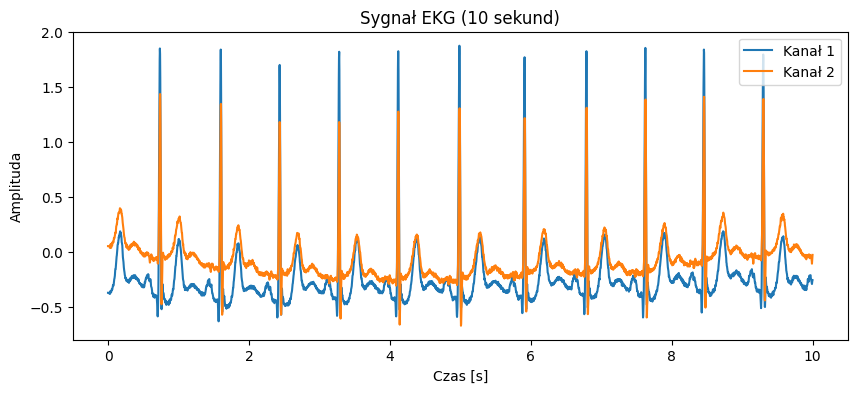


Adnotacje:
Czas: 0.06s, Typ arytmii: +
Czas: 0.74s, Typ arytmii: N
Czas: 1.60s, Typ arytmii: N
Czas: 2.43s, Typ arytmii: N
Czas: 3.28s, Typ arytmii: N
Czas: 4.12s, Typ arytmii: N
Czas: 4.99s, Typ arytmii: N
Czas: 5.91s, Typ arytmii: N
Czas: 6.79s, Typ arytmii: N
Czas: 7.62s, Typ arytmii: N
Czas: 8.46s, Typ arytmii: N
Czas: 9.30s, Typ arytmii: N
Czas: 10.13s, Typ arytmii: N
Czas: 10.98s, Typ arytmii: N


In [38]:
import matplotlib.pyplot as plt

# Wczytaj rekord z MIT-BIH Arrhythmia Database (np. rekord 100)
record = wfdb.rdrecord(data_dir + '/103')  # Zastąp ścieżką do lokalnego pliku

# Wczytaj adnotacje
annotation = wfdb.rdann(data_dir + '/103', 'atr')  # Adnotacje dla rekordu 100

# Wyświetl podstawowe informacje o sygnale
print("Informacje o sygnale:")
print(f"Częstotliwość próbkowania: {record.fs} Hz")
print(f"Czas trwania sygnału: {record.sig_len / record.fs} s")
print(f"Liczba kanałów: {record.n_sig}")

# Wykres sygnału EKG (pierwsze 10 sekund)
time = [i / record.fs for i in range(record.sig_len)]  # Oś czasu
plt.figure(figsize=(10, 4))
plt.plot(time[:3600], record.p_signal[:3600, 0], label="Kanał 1")  # Pierwszy kanał
plt.plot(time[:3600], record.p_signal[:3600, 1], label="Kanał 2")  # Drugi kanał
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.title('Sygnał EKG (10 sekund)')
plt.legend()
plt.show()

# Wyświetl adnotacje (typ arytmii i pozycje w czasie)
print("\nAdnotacje:")
for idx, sample in enumerate(annotation.sample[:14]):  # Przykładowe pierwsze 10 adnotacji
    time_sec = sample / record.fs
    label = annotation.symbol[idx]
    print(f"Czas: {time_sec:.2f}s, Typ arytmii: {label}")


Wyświetl otoczenie migotania

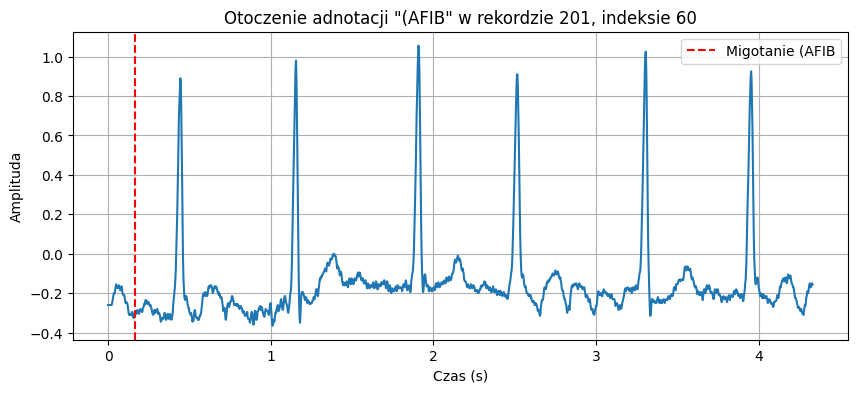

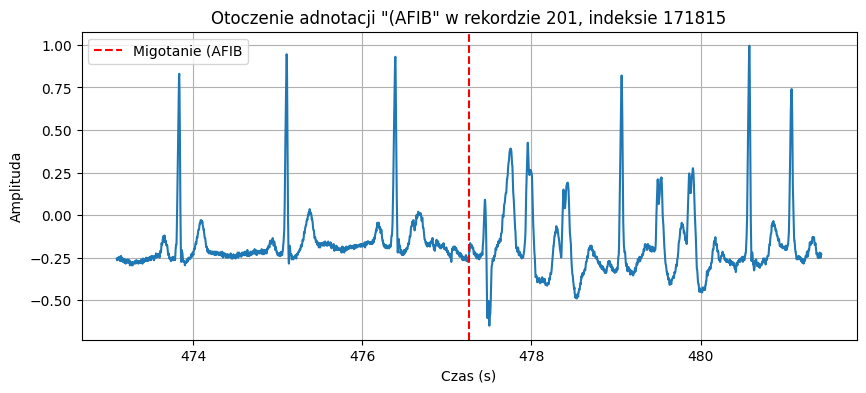

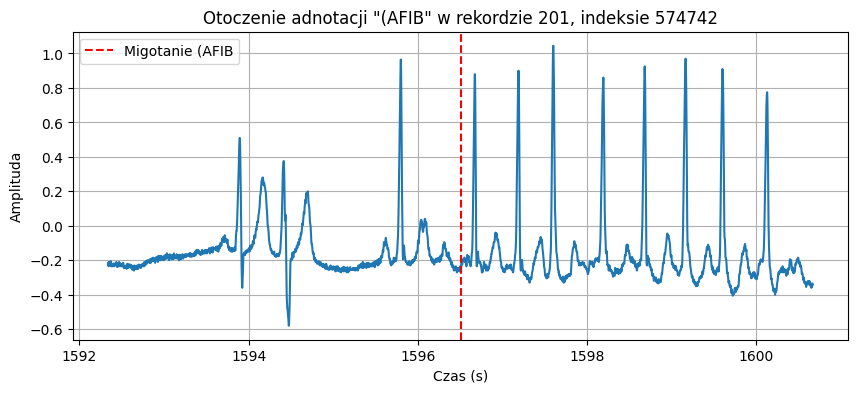

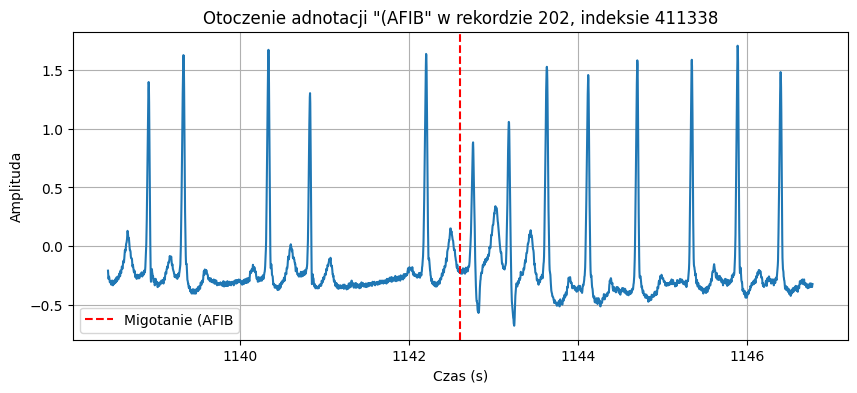

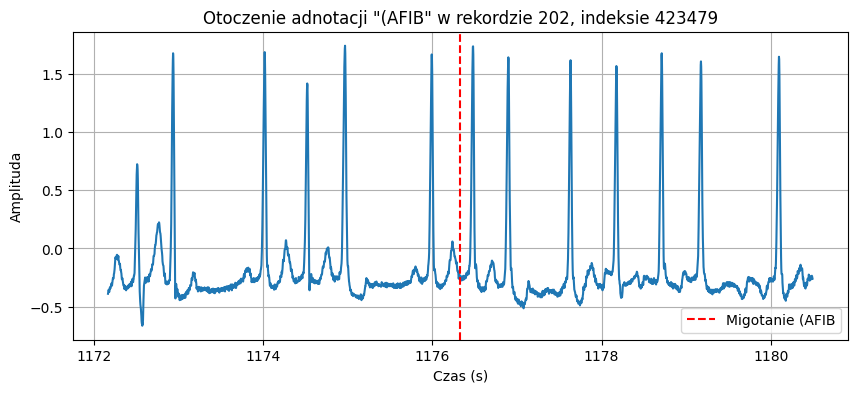

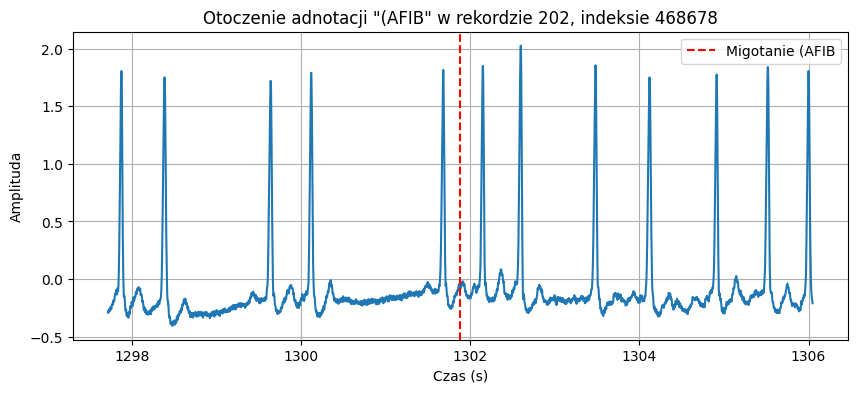

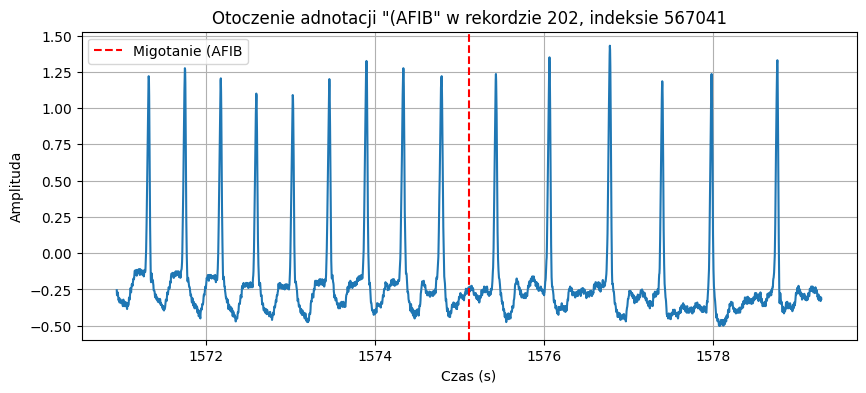

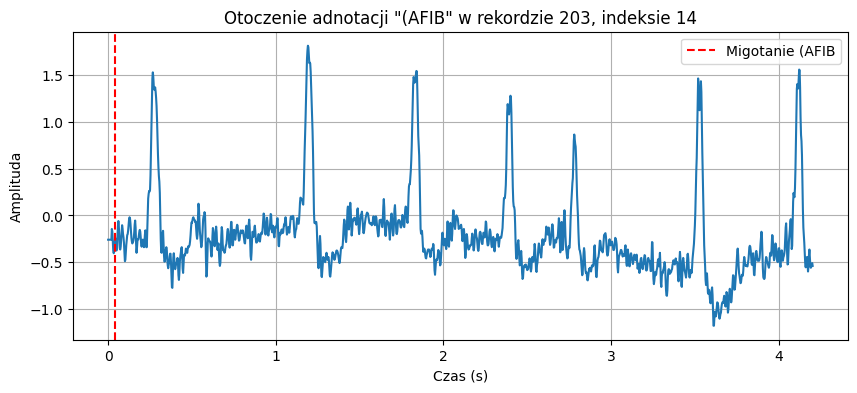

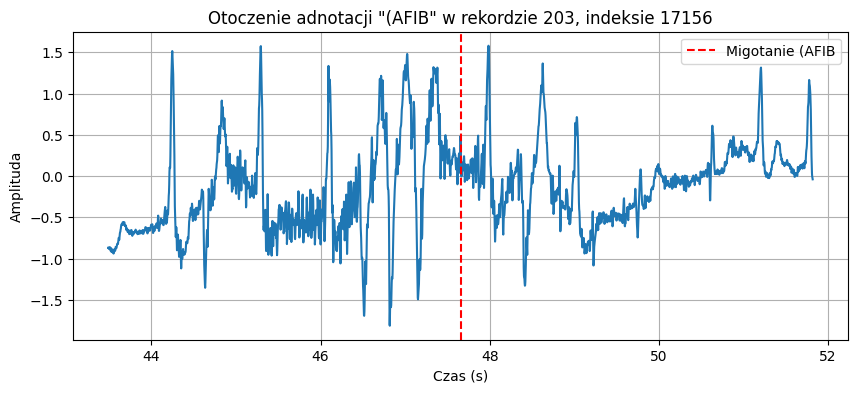

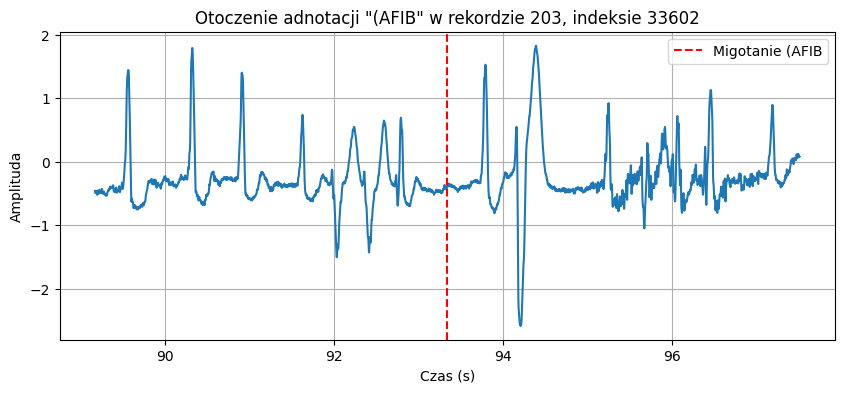

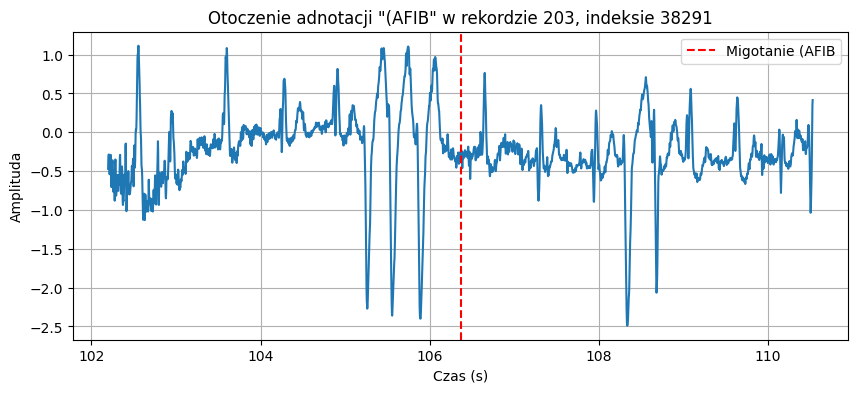

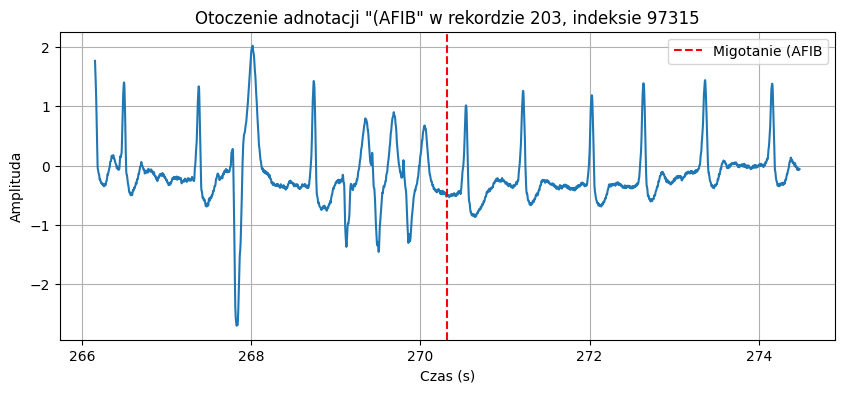

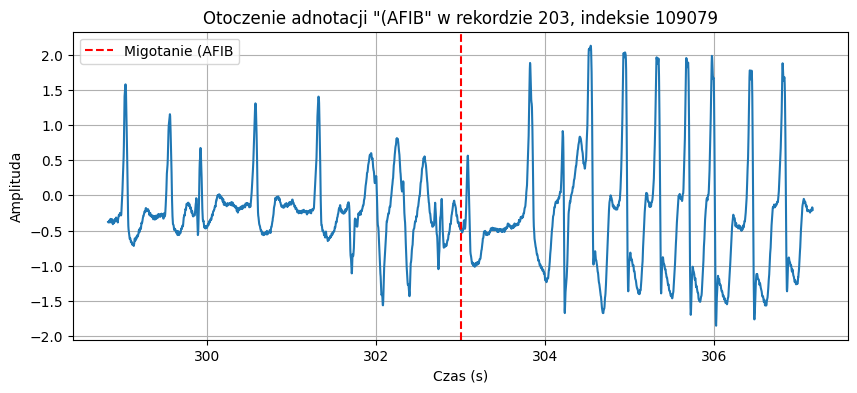

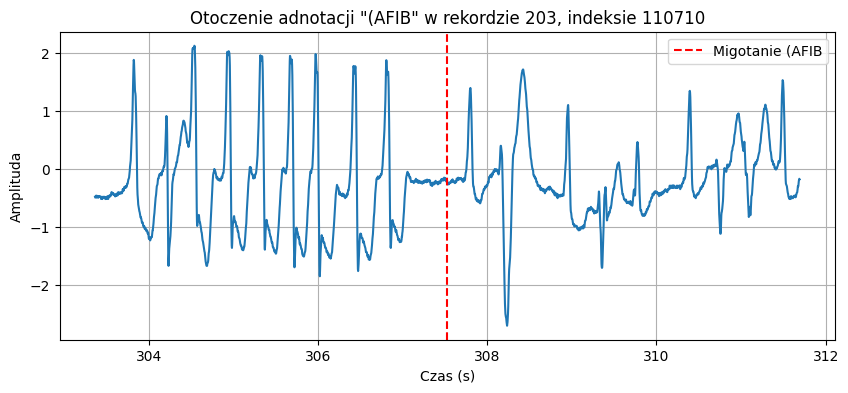

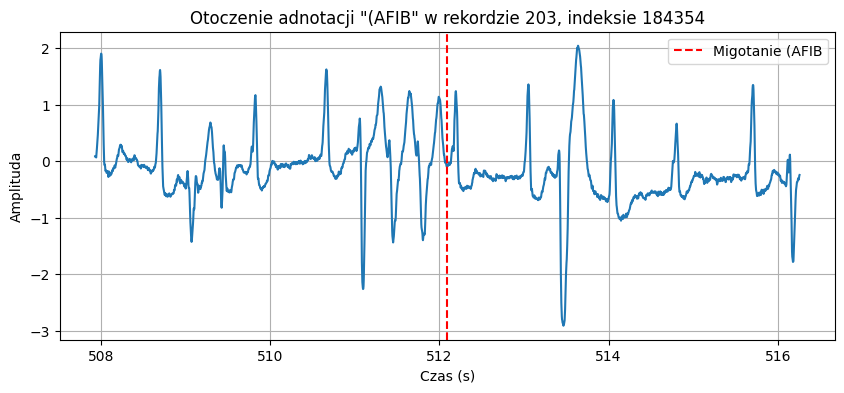

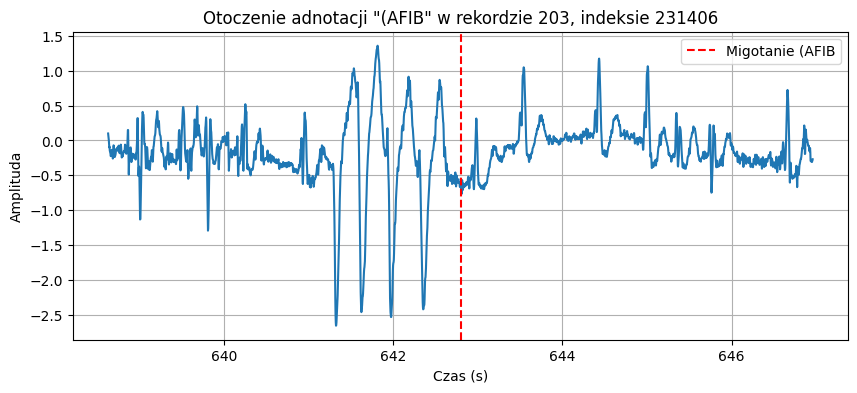

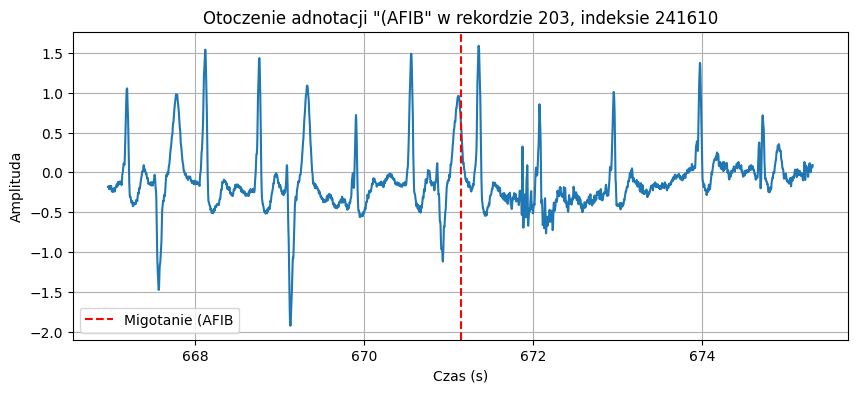

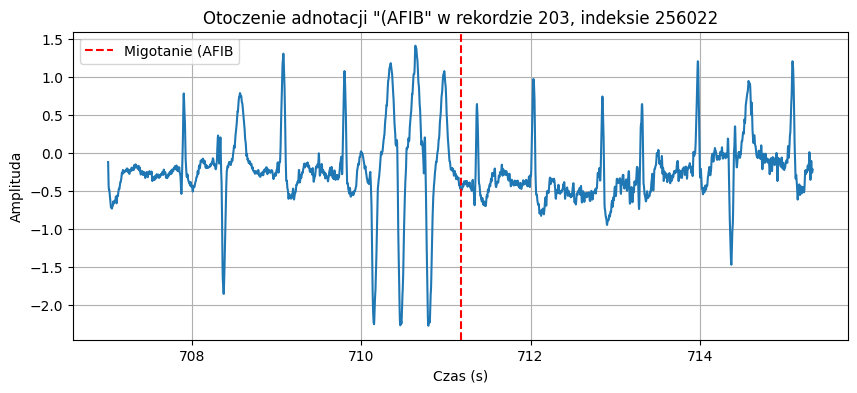

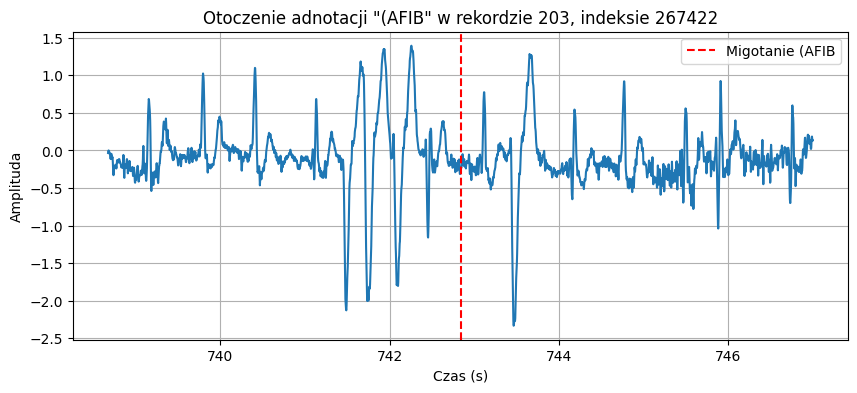

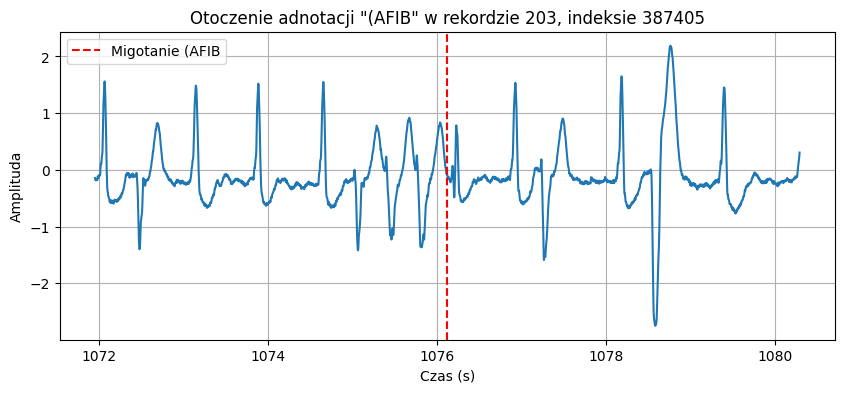

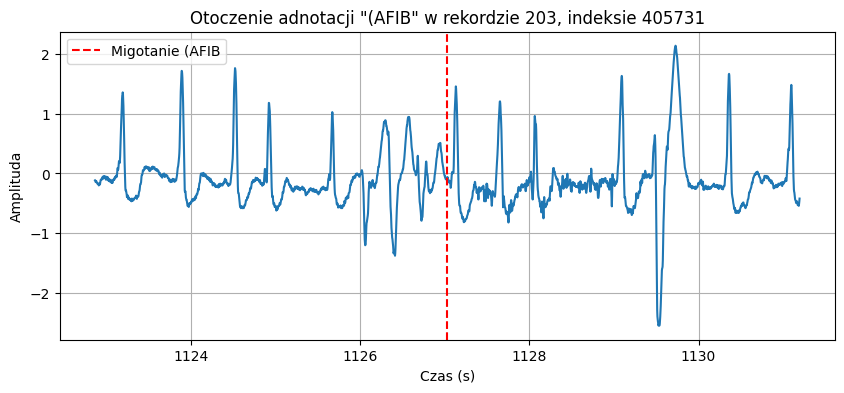

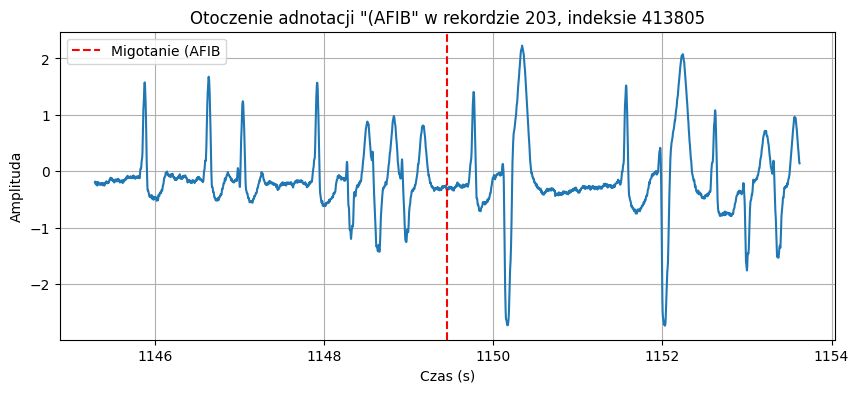

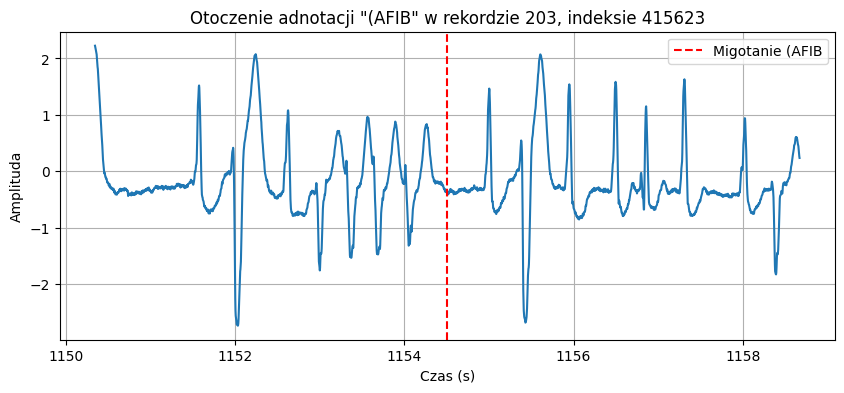

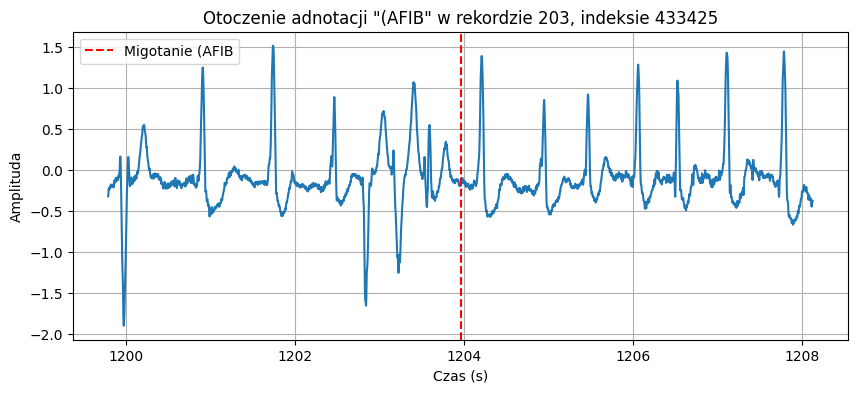

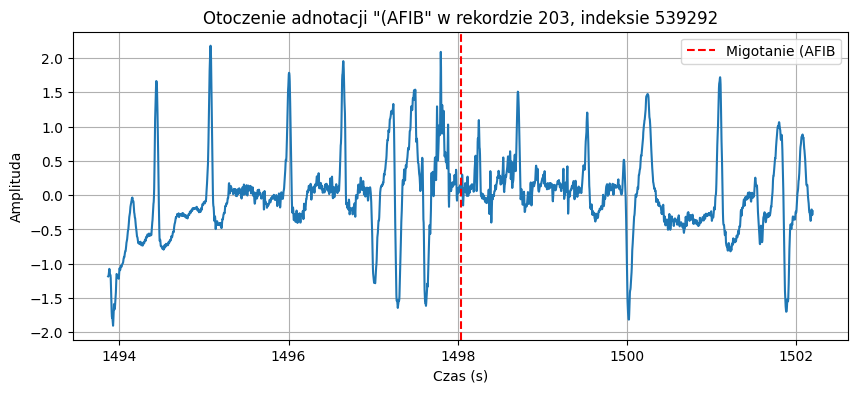

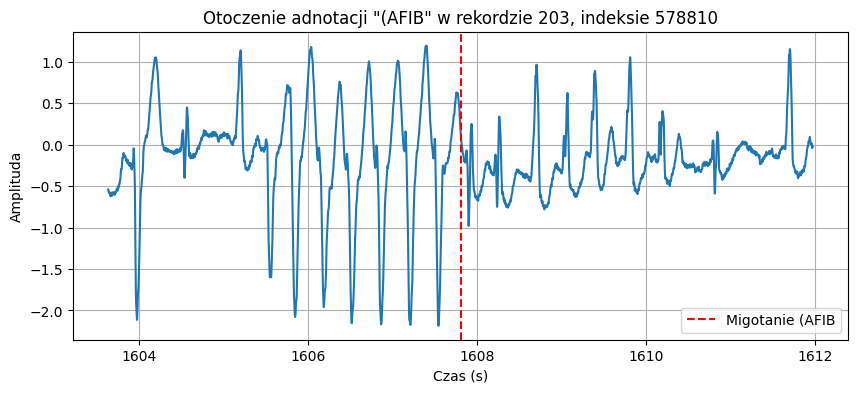

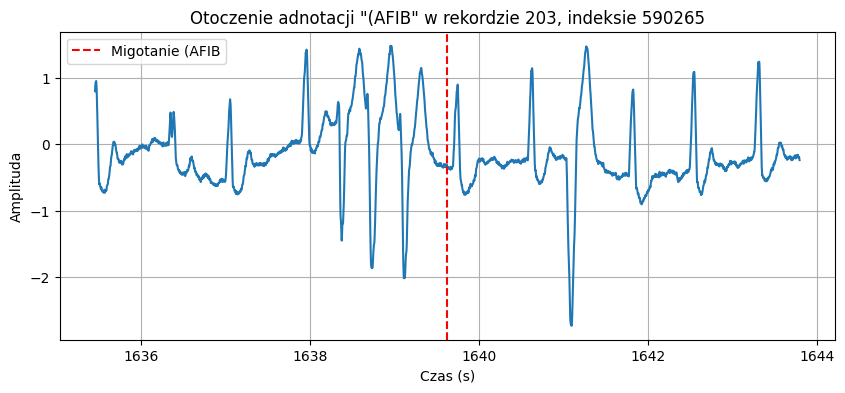

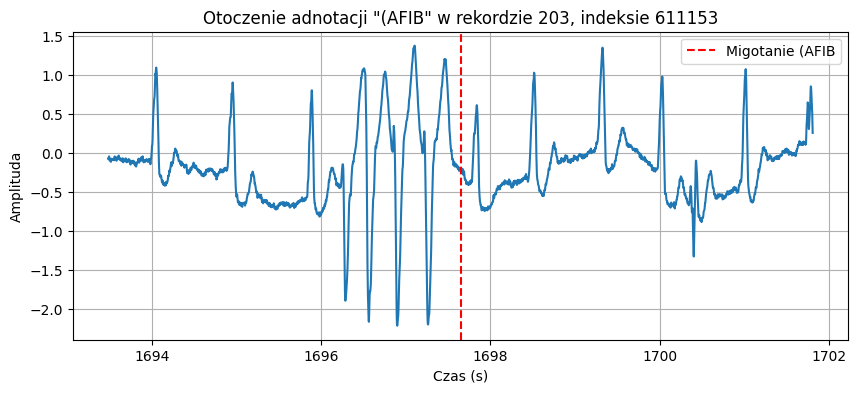

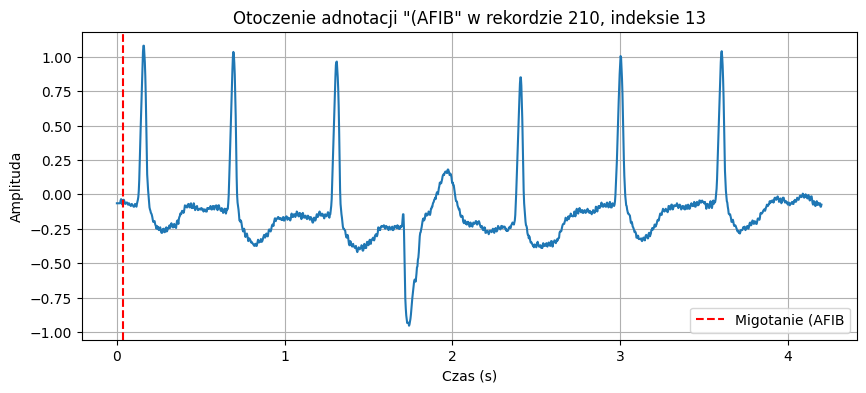

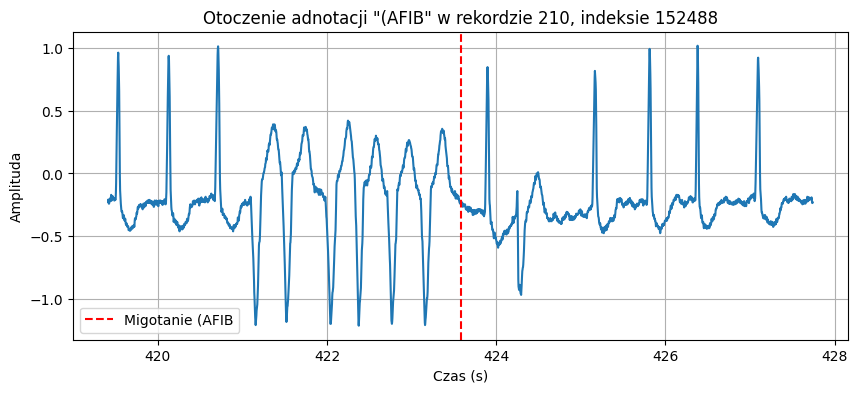

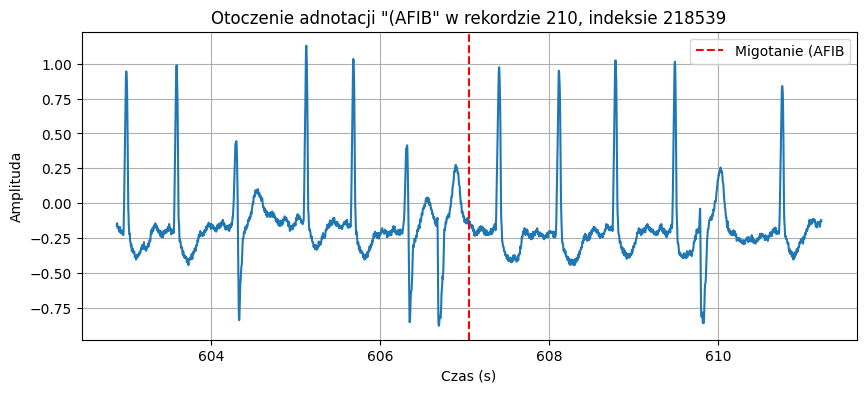

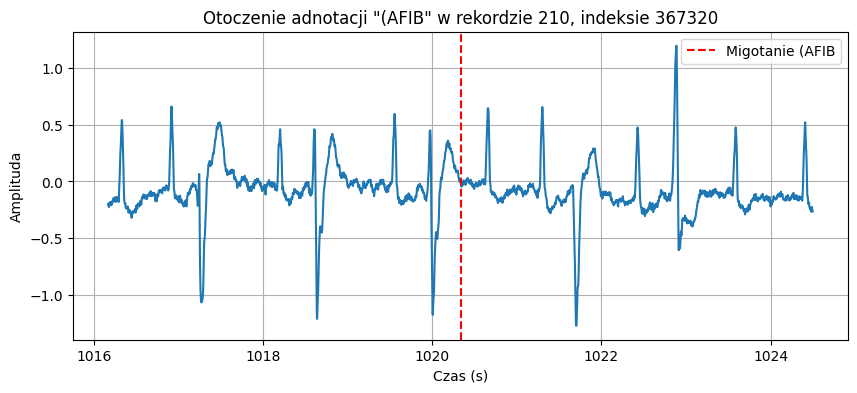

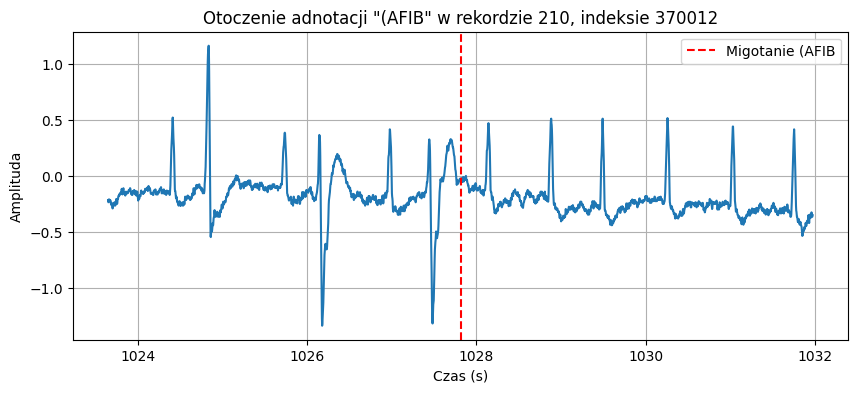

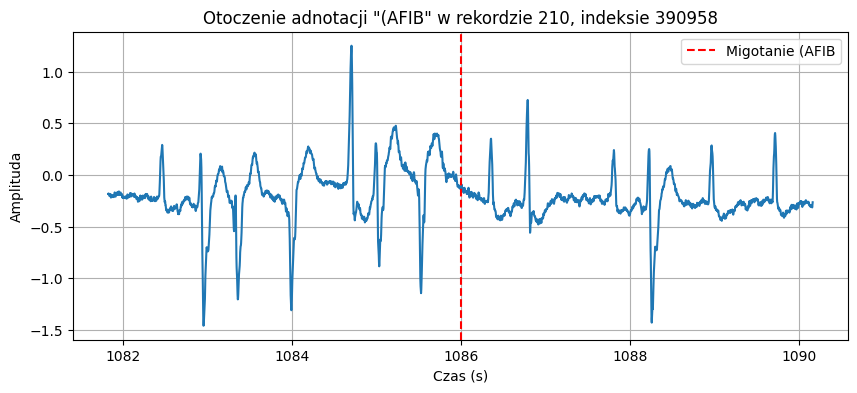

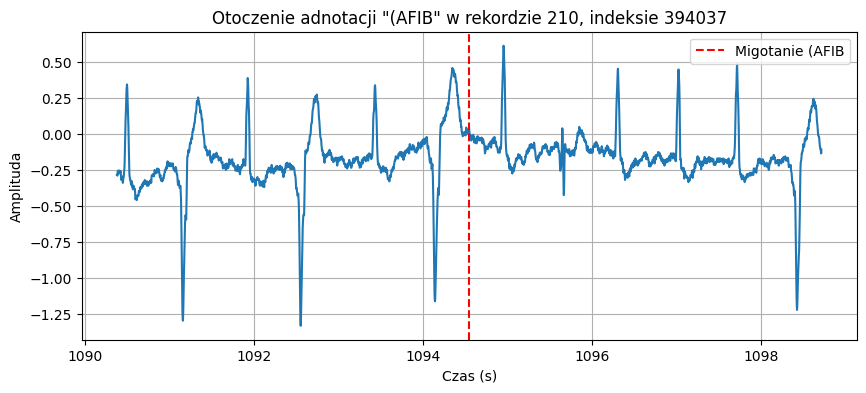

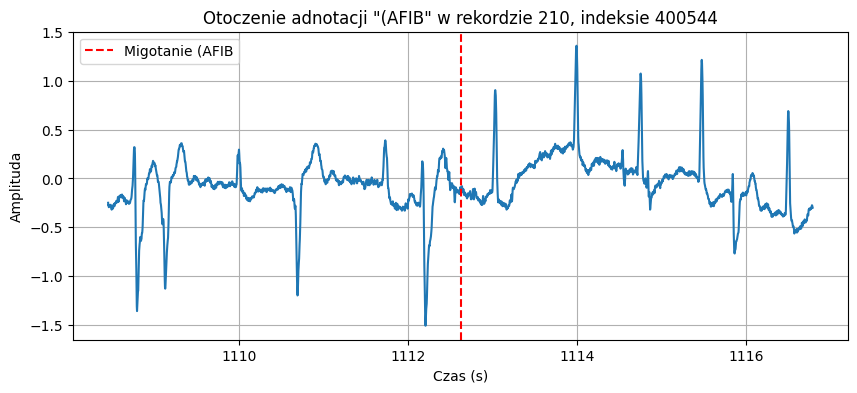

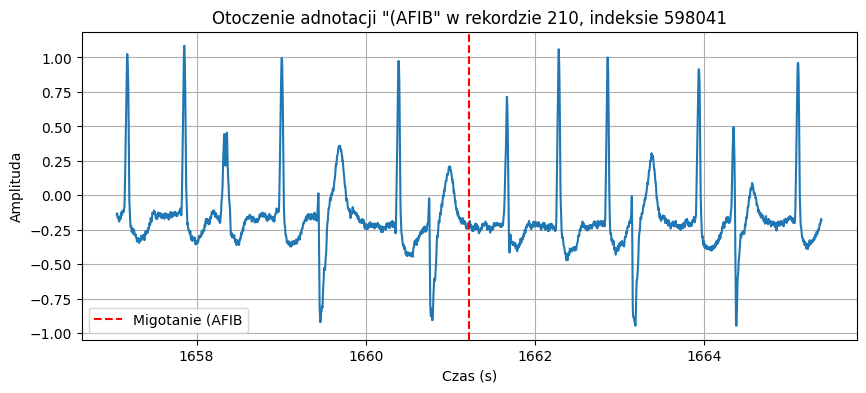

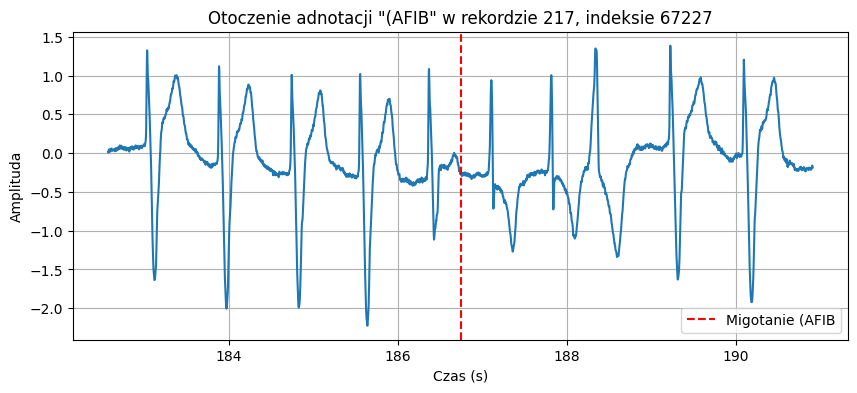

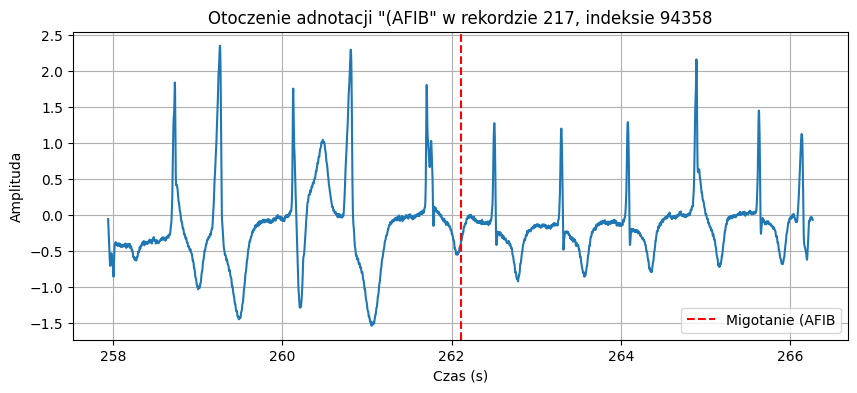

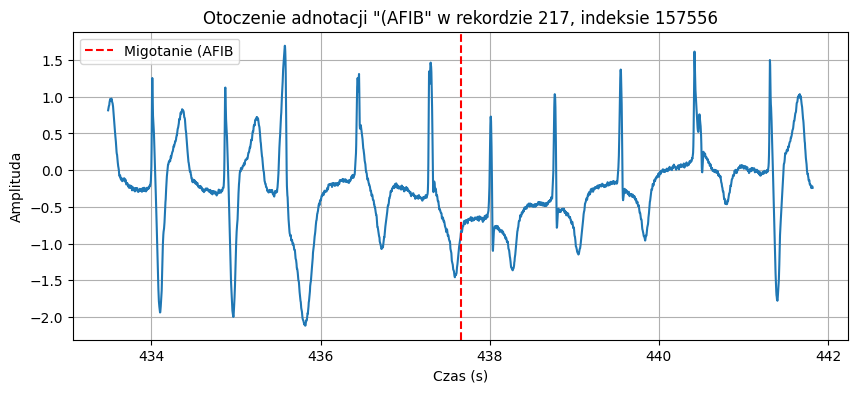

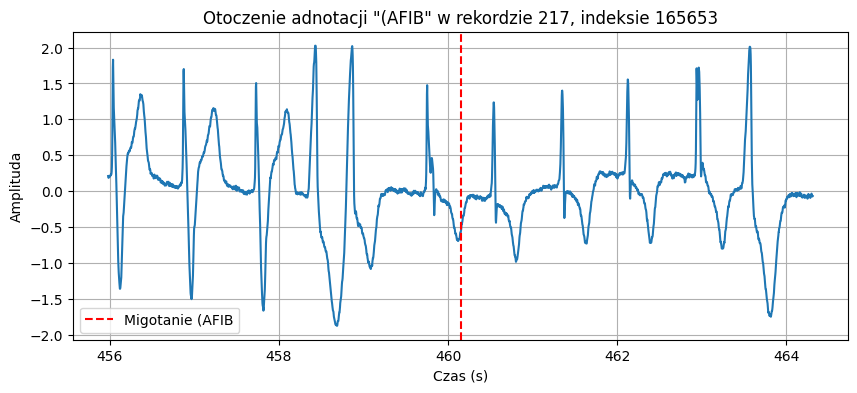

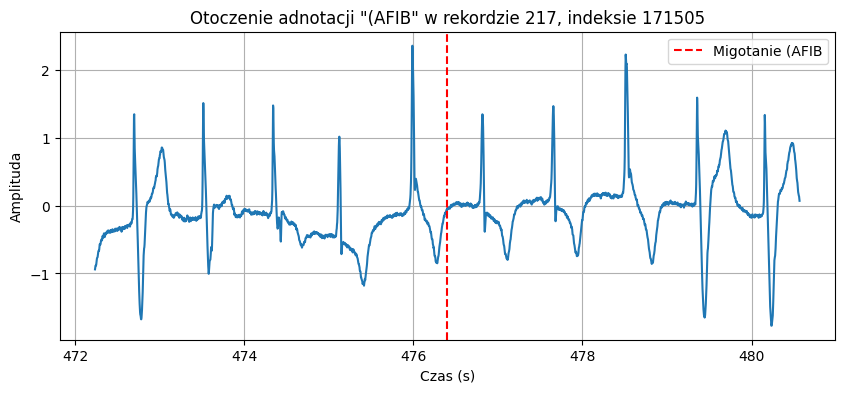

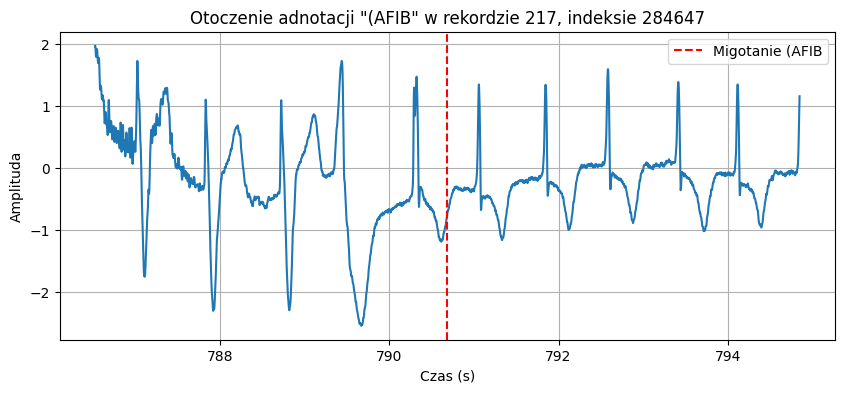

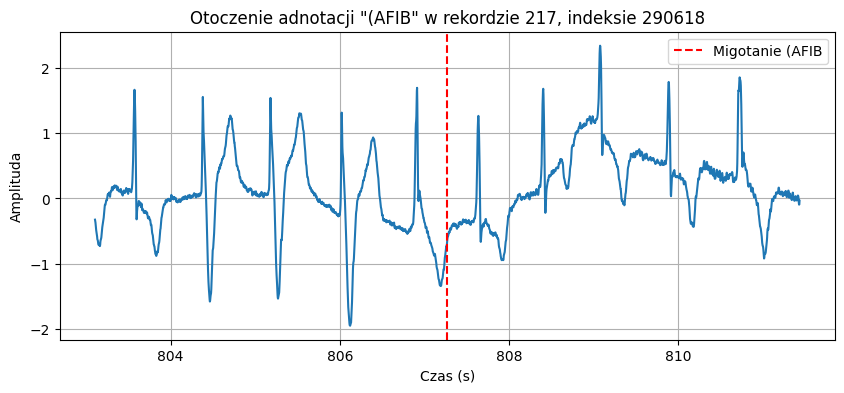

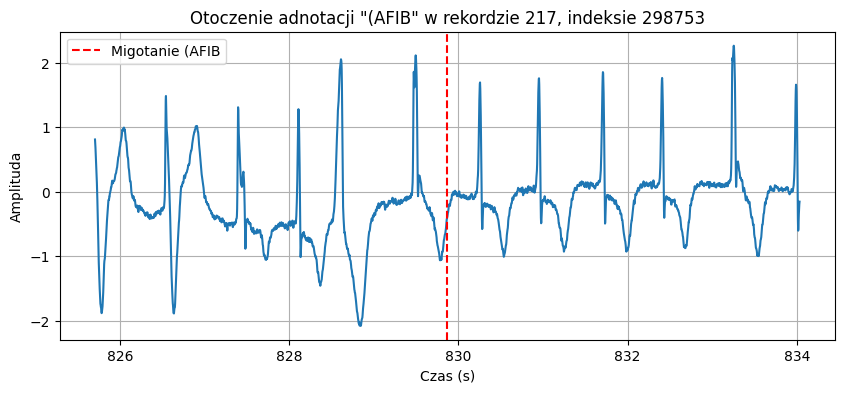

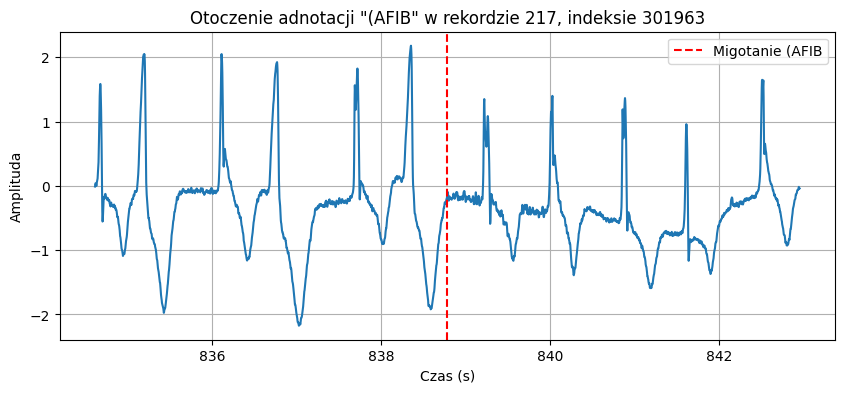

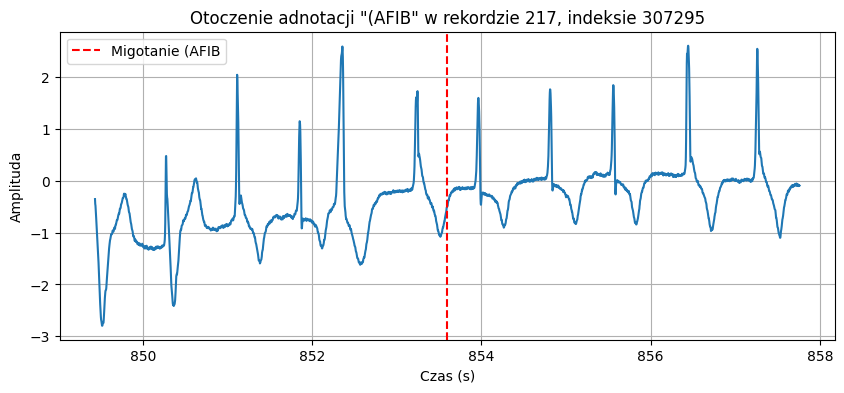

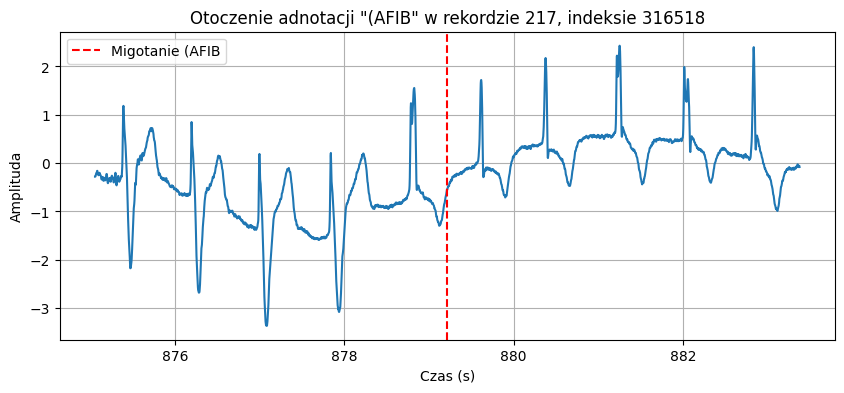

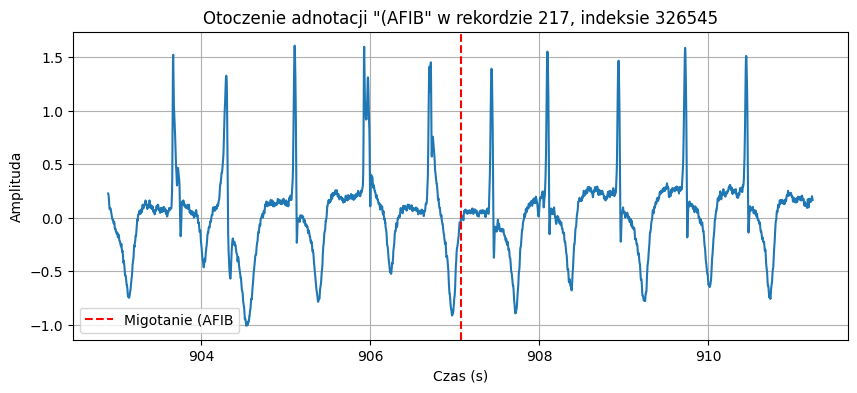

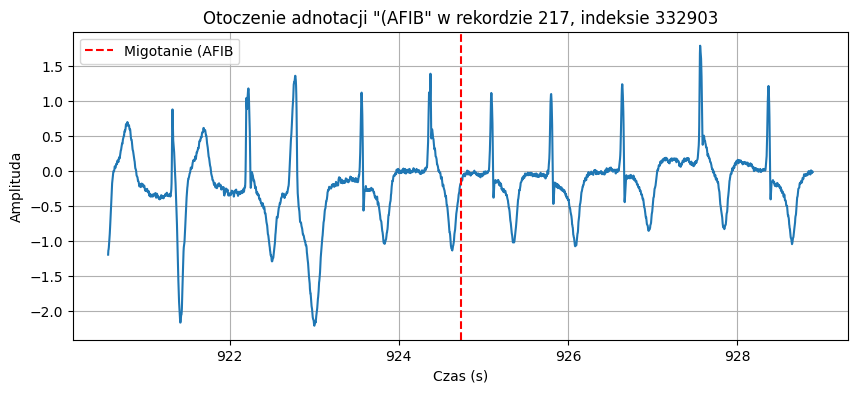

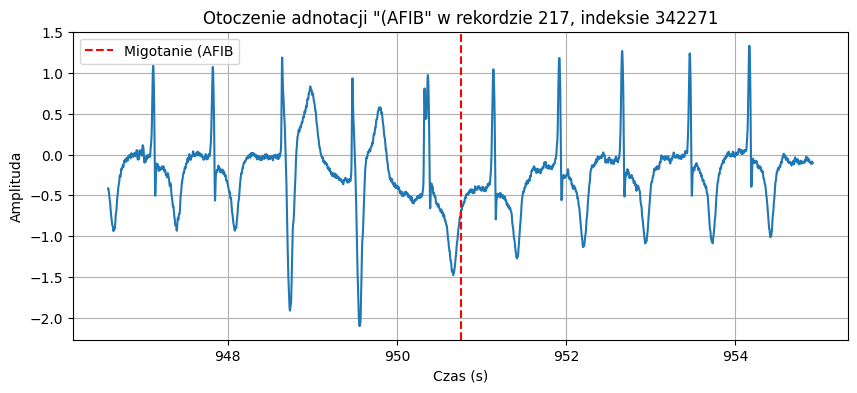

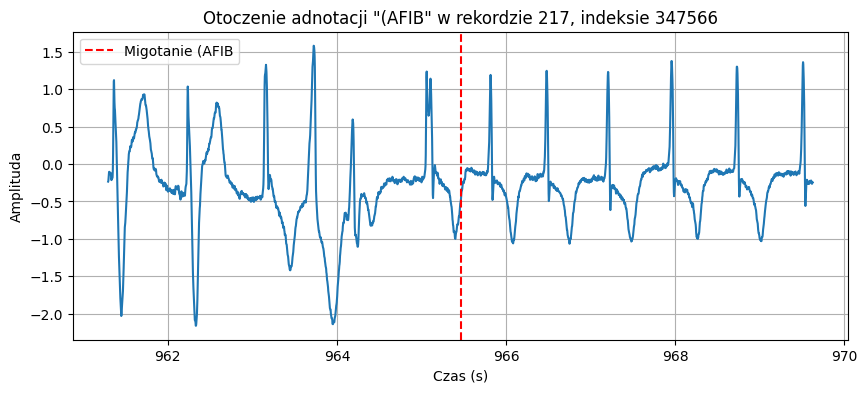

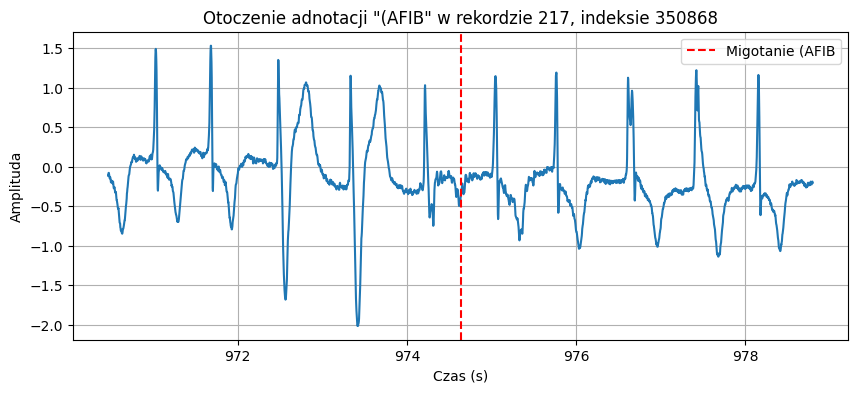

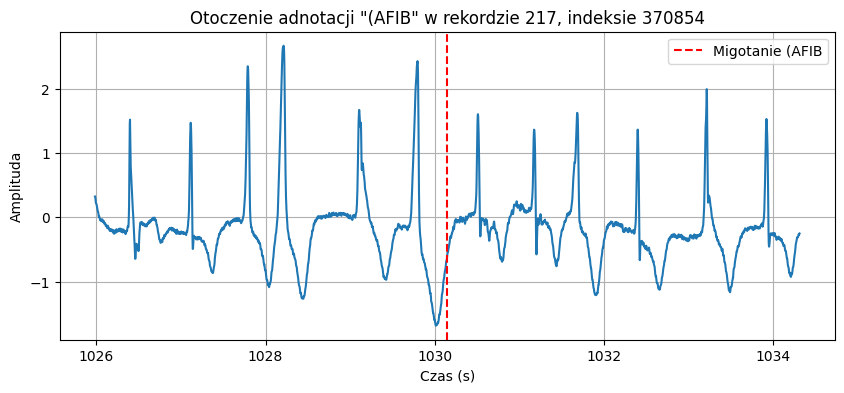

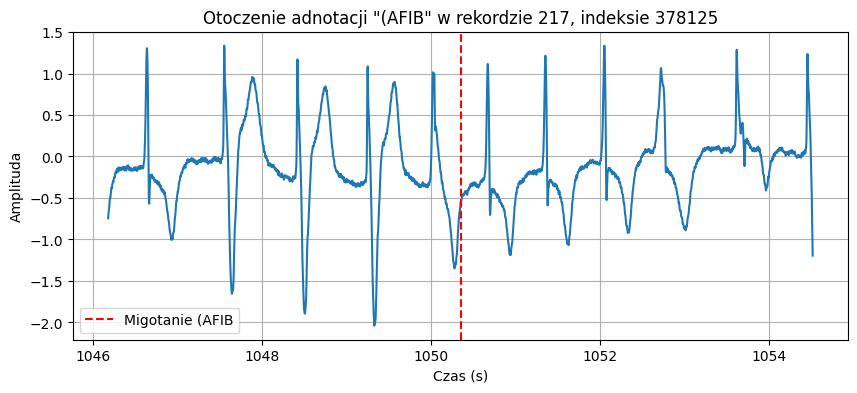

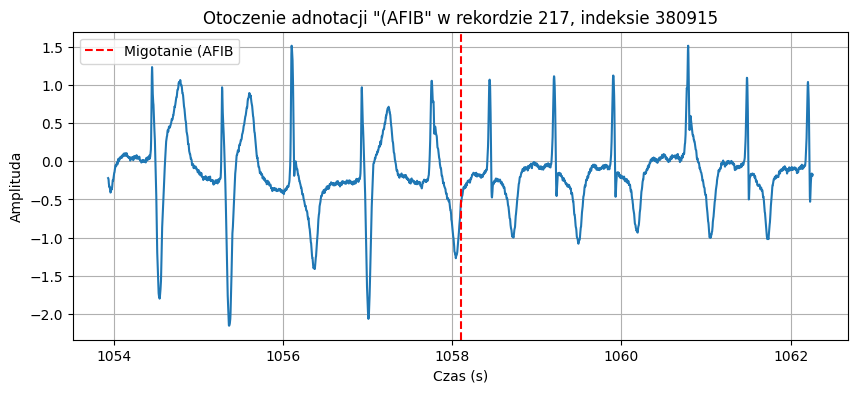

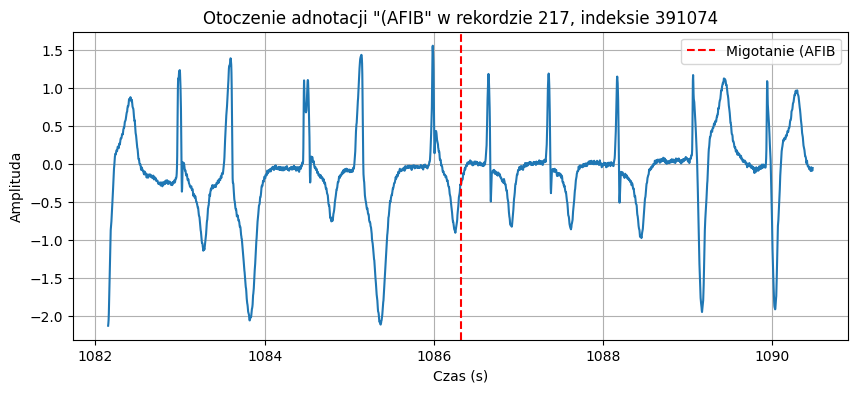

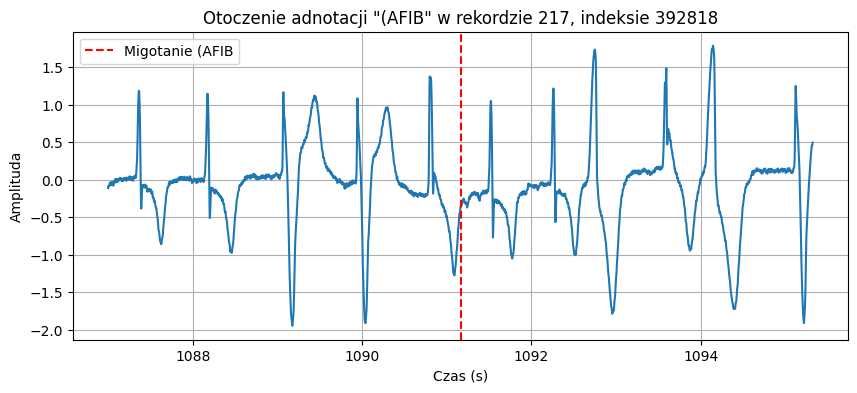

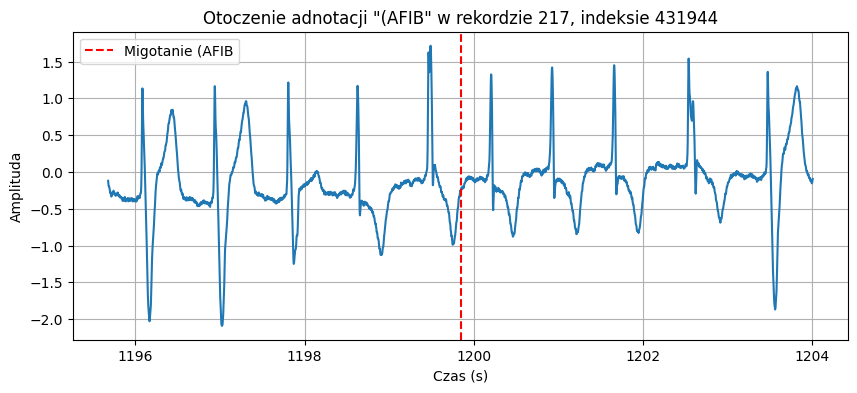

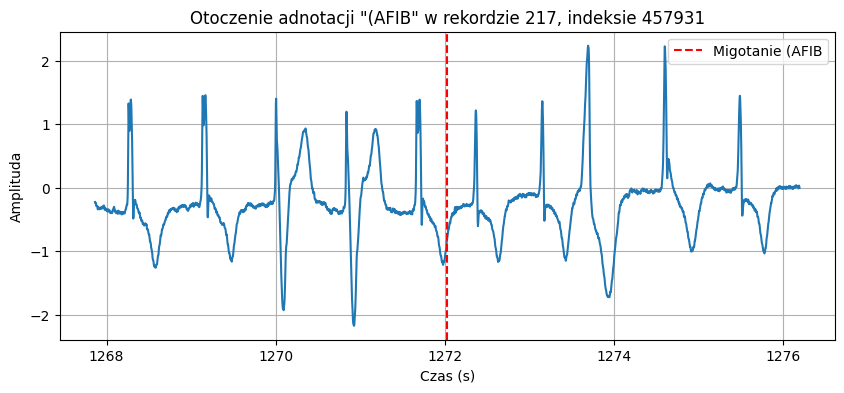

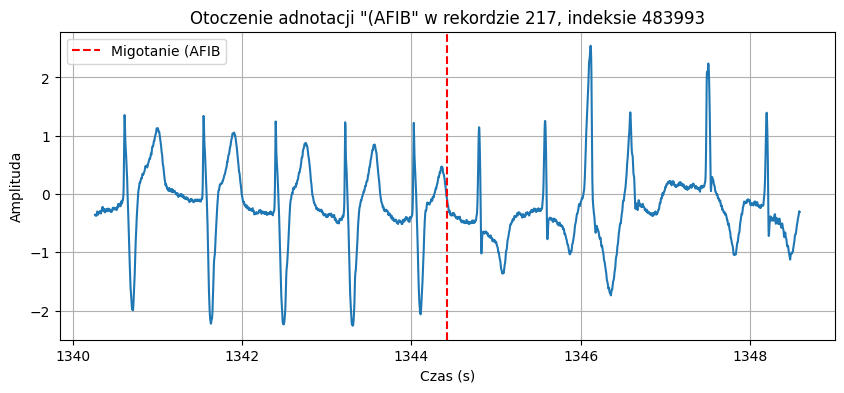

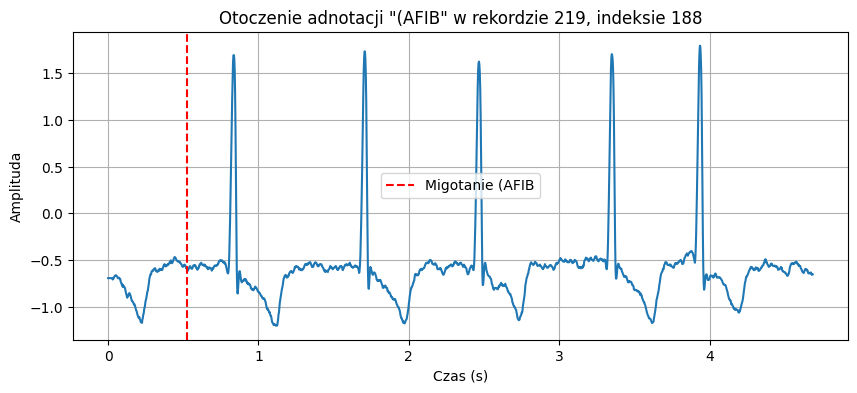

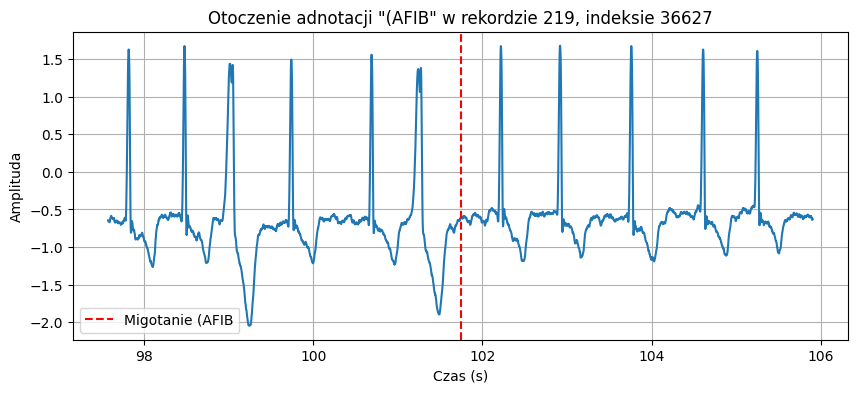

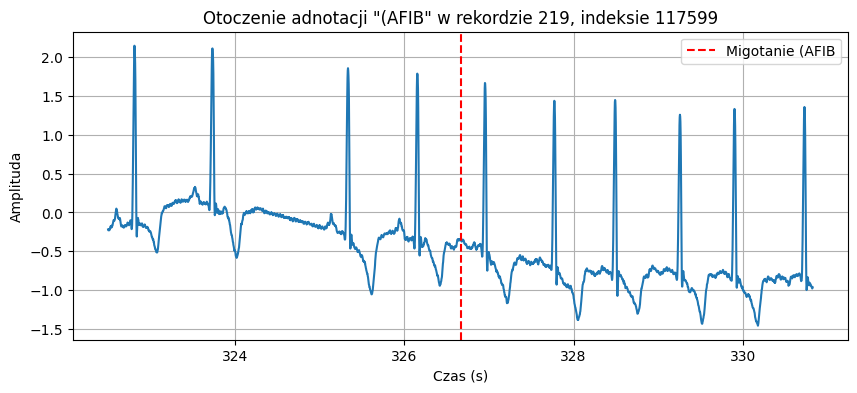

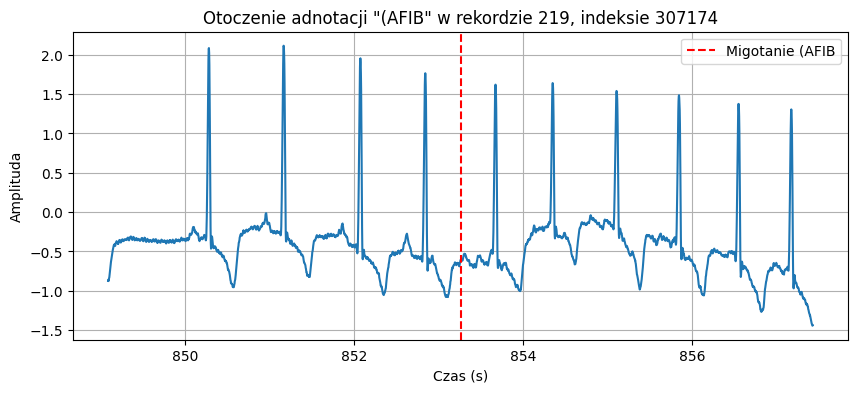

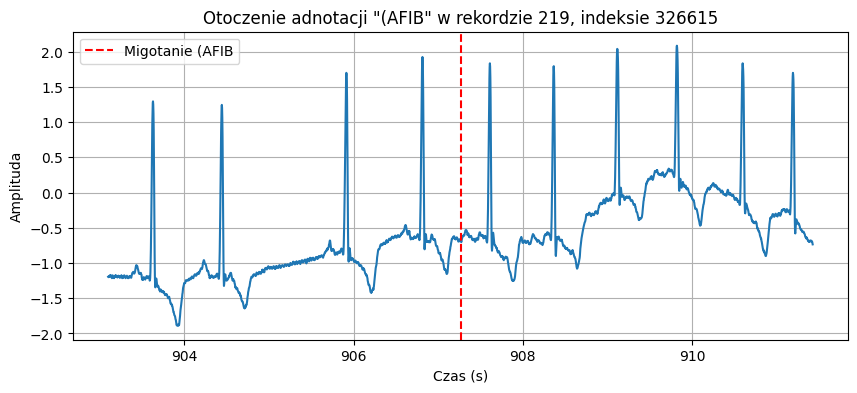

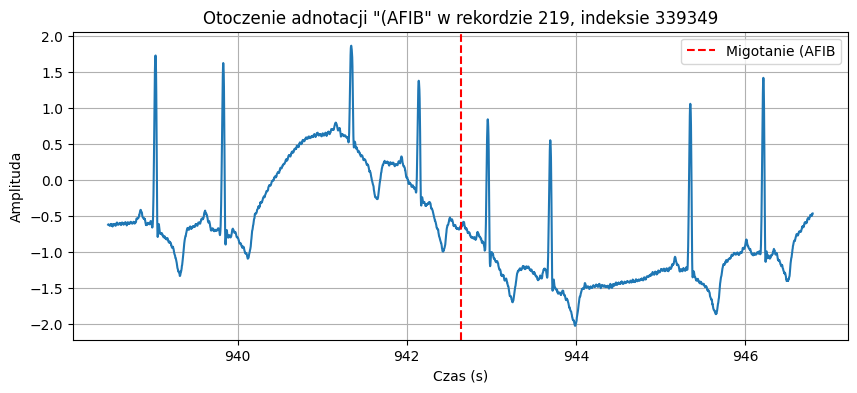

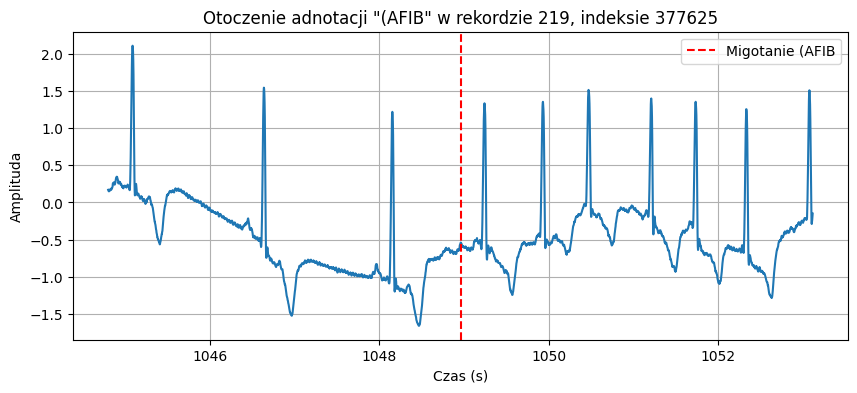

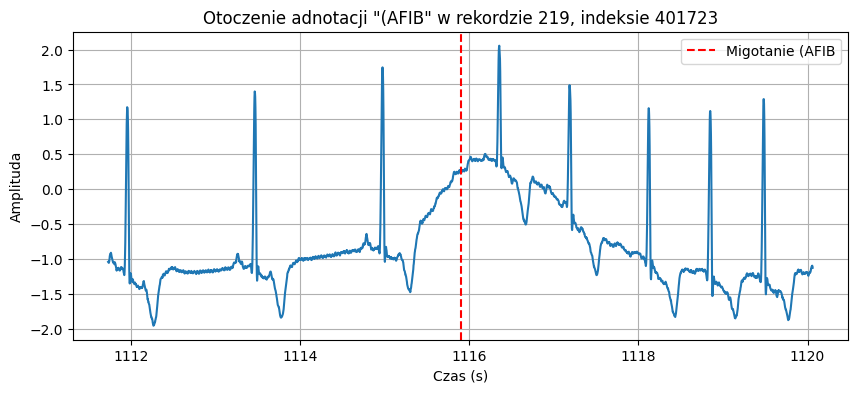

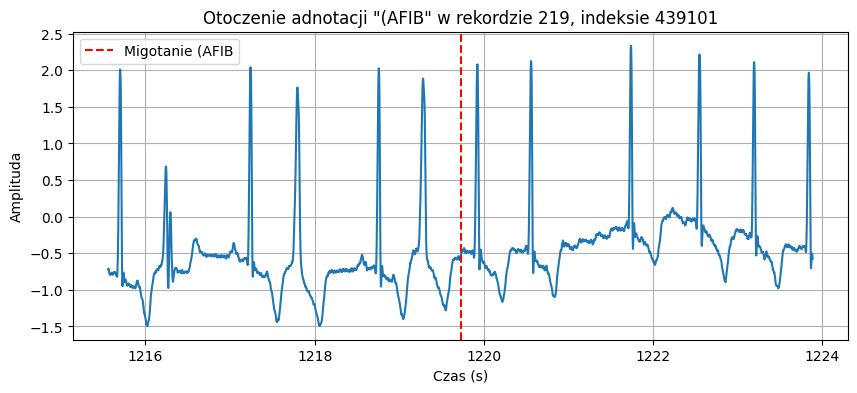

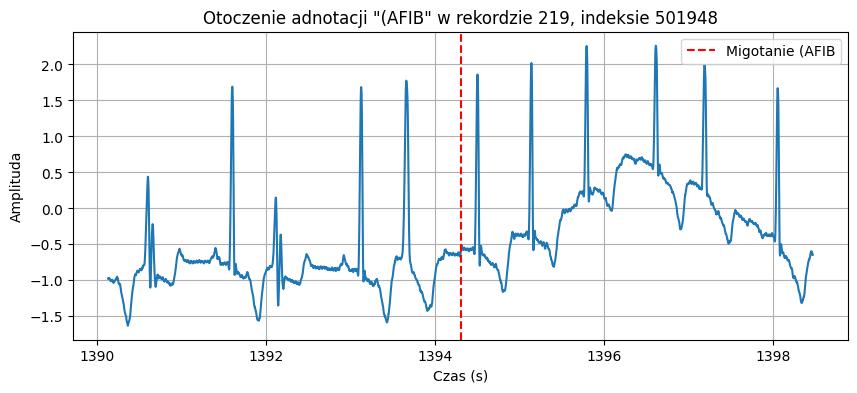

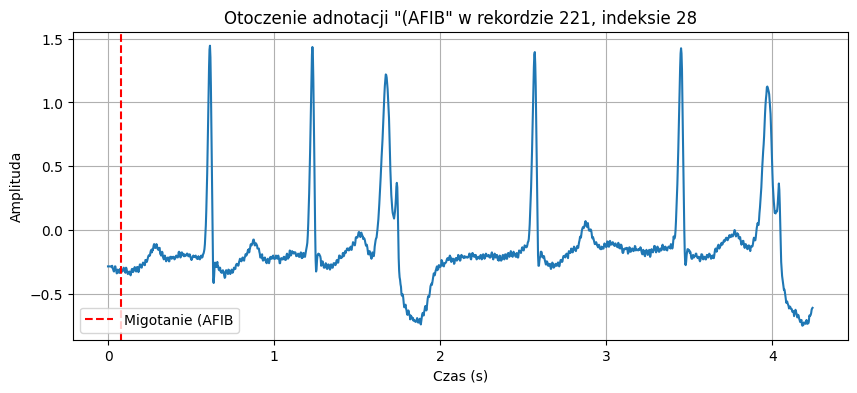

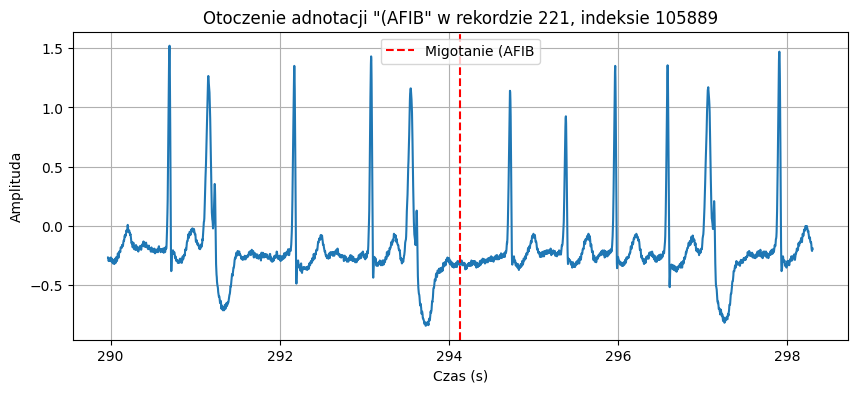

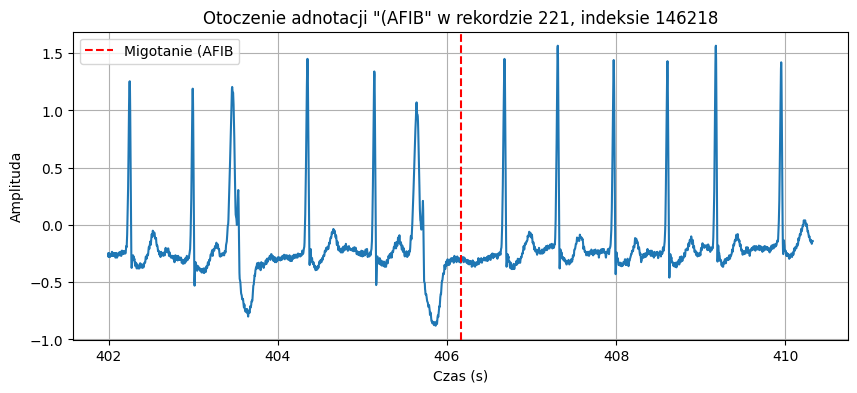

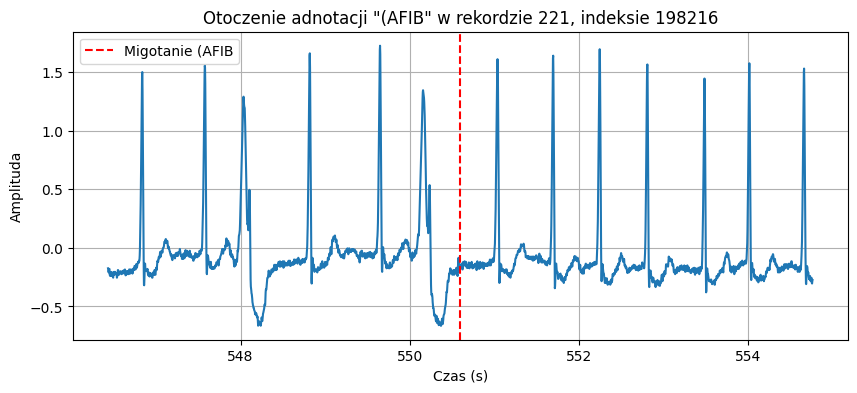

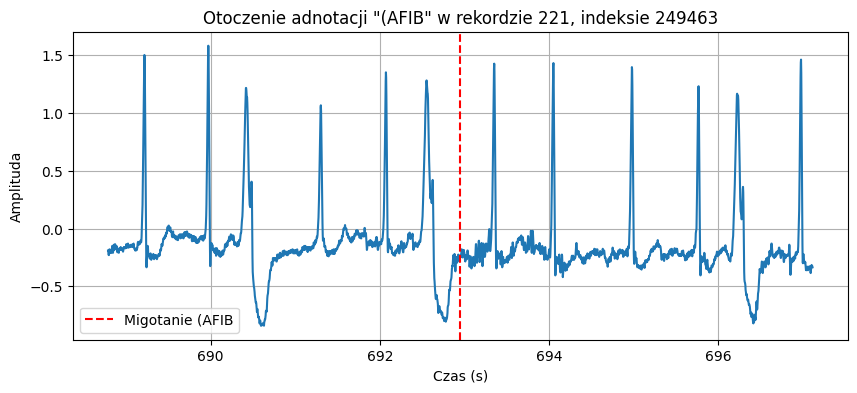

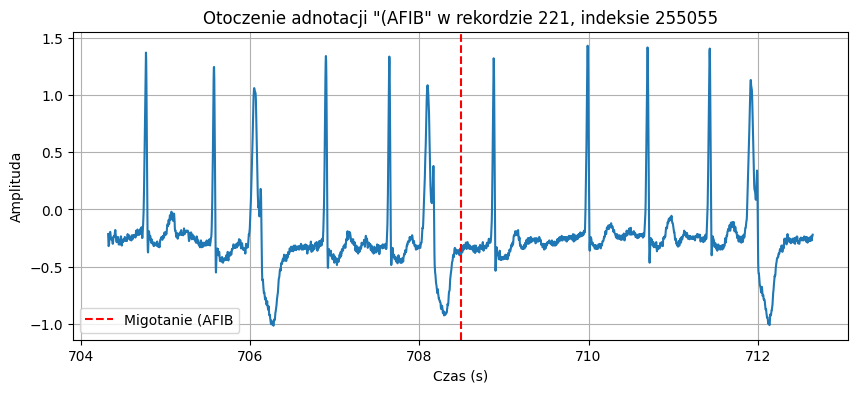

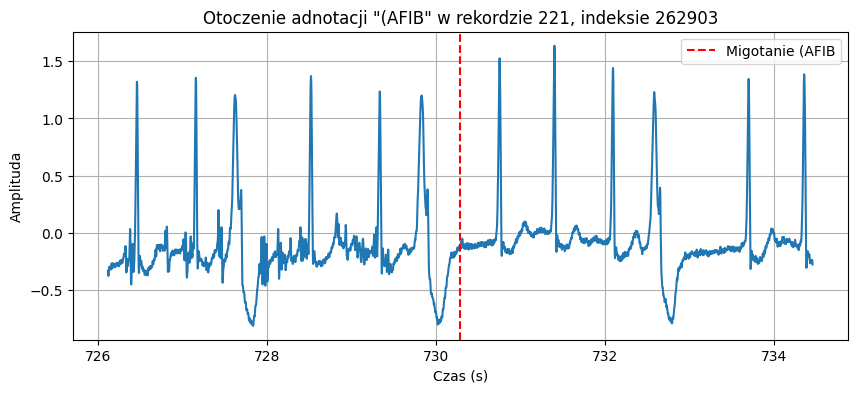

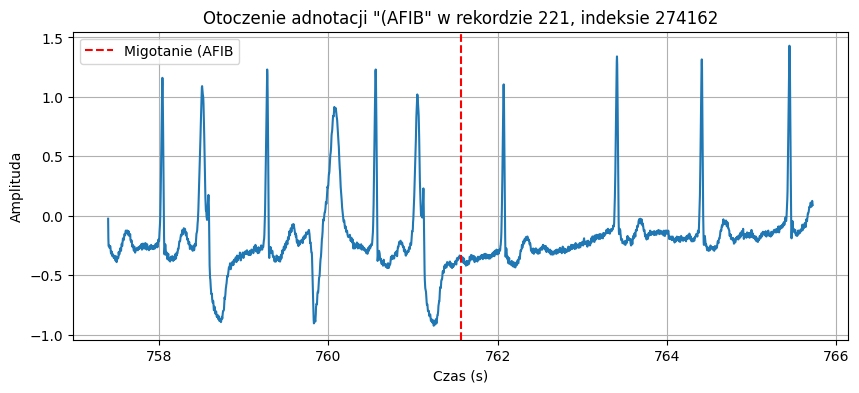

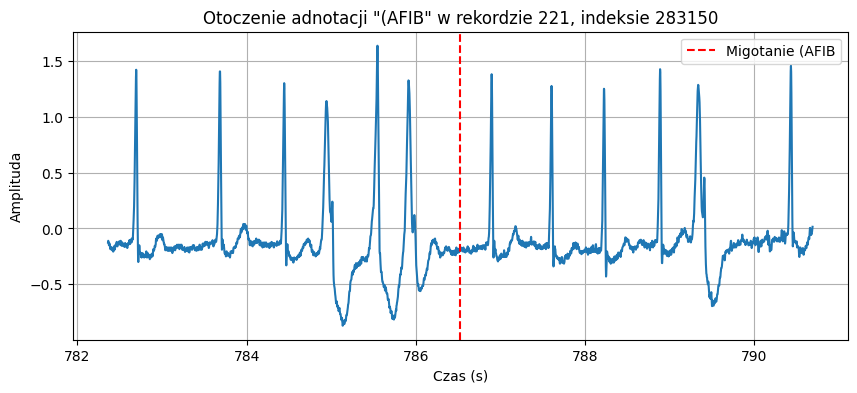

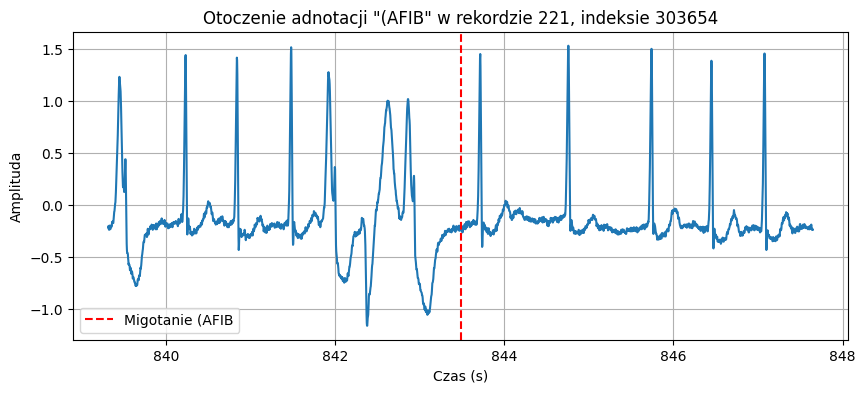

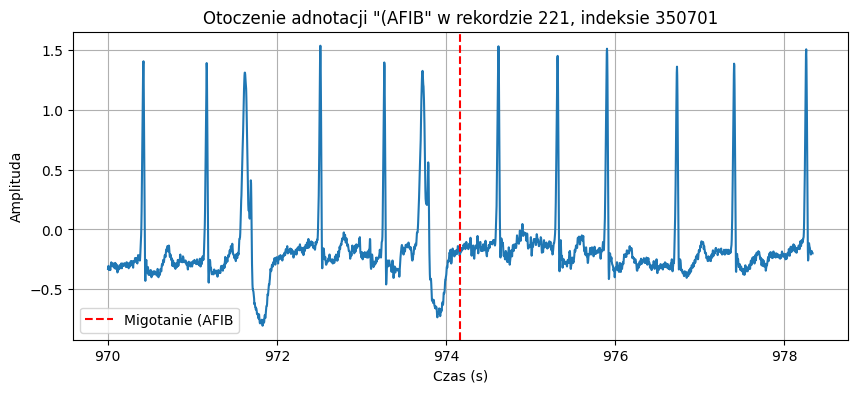

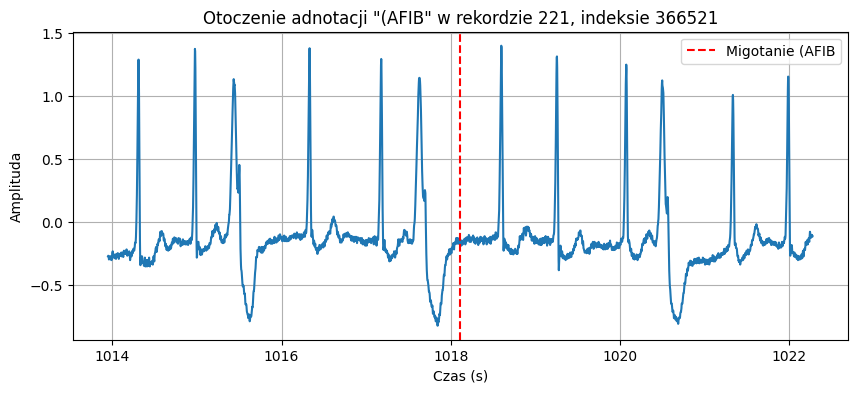

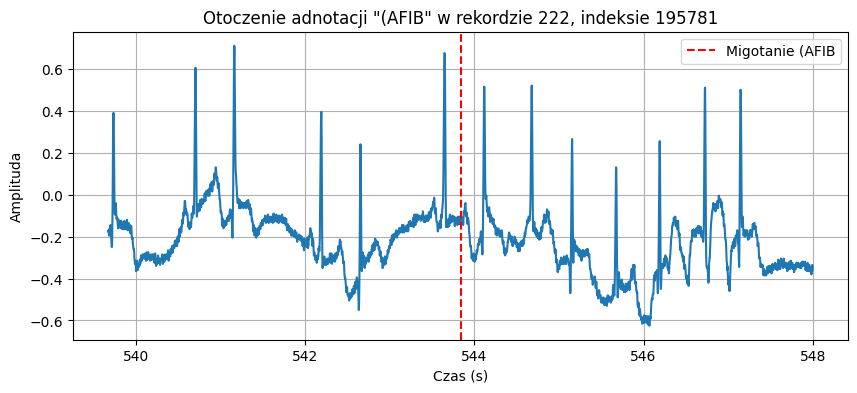

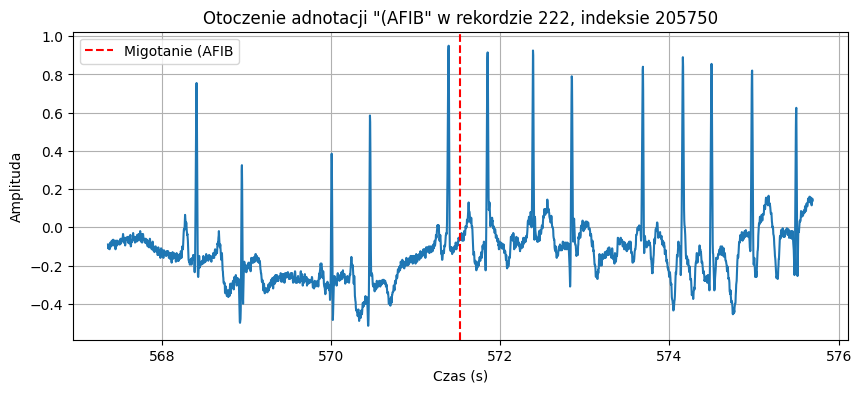

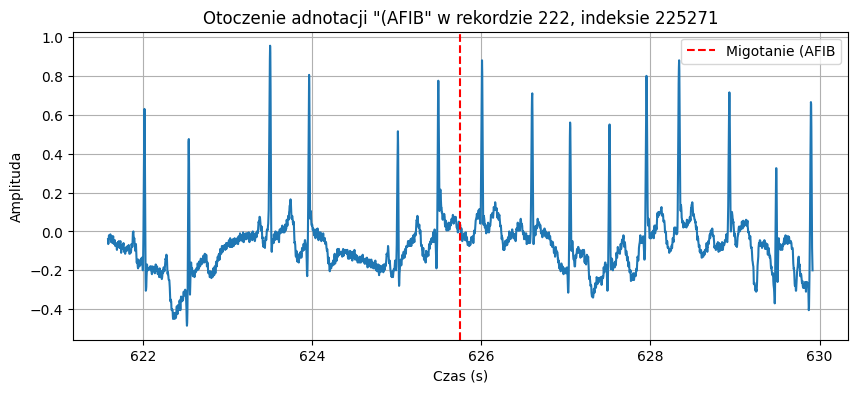

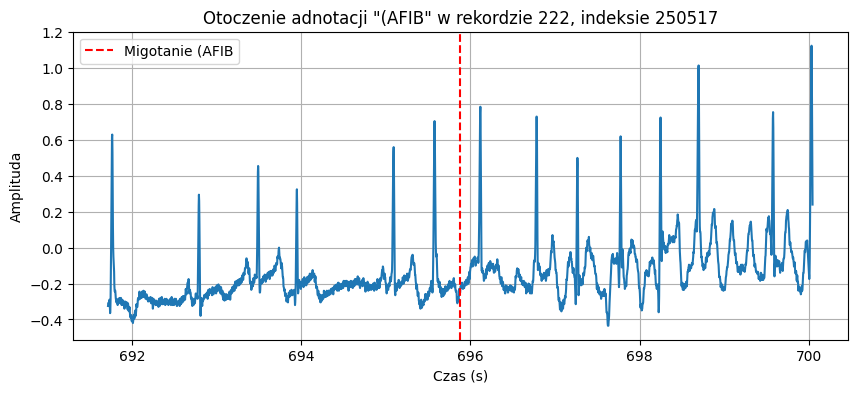

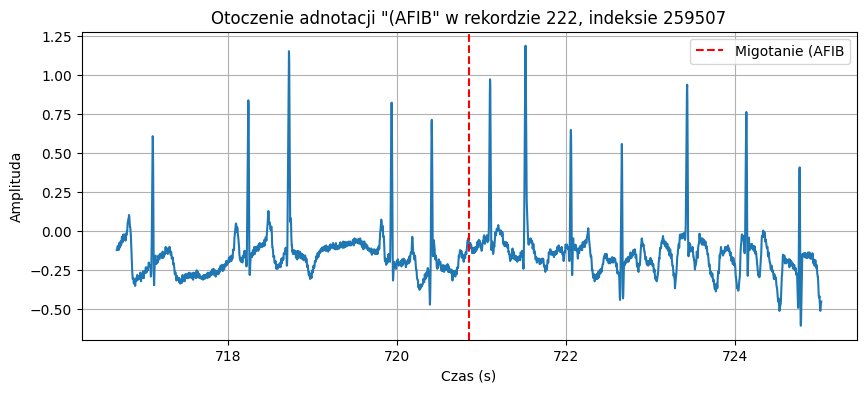

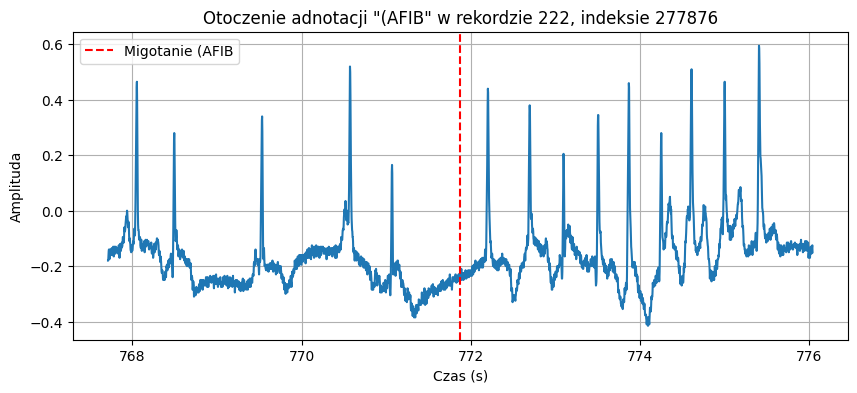

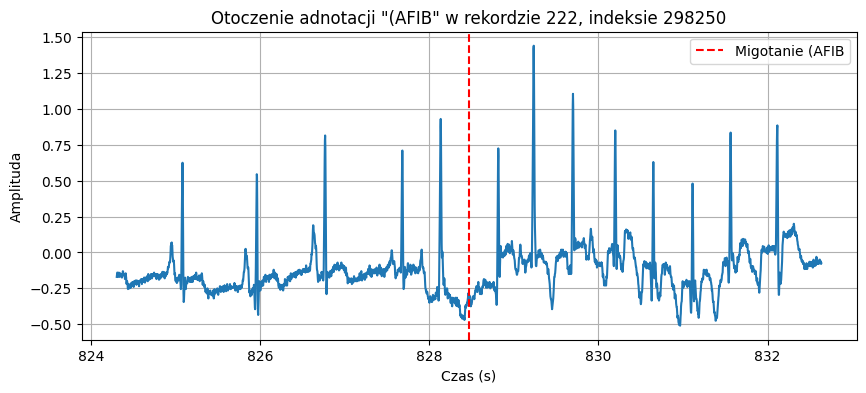

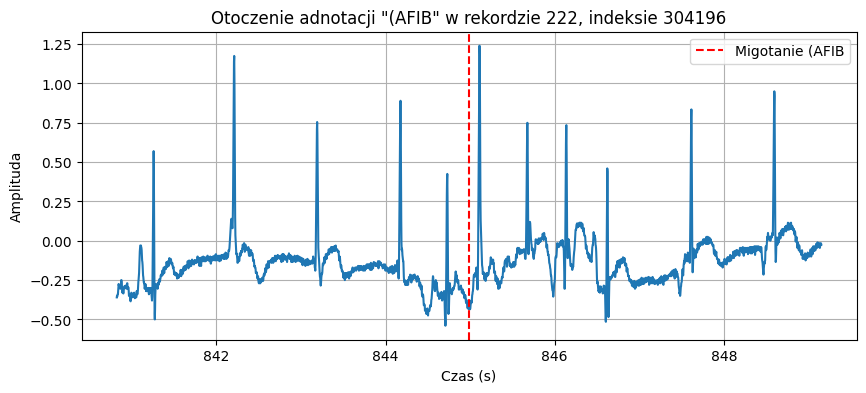

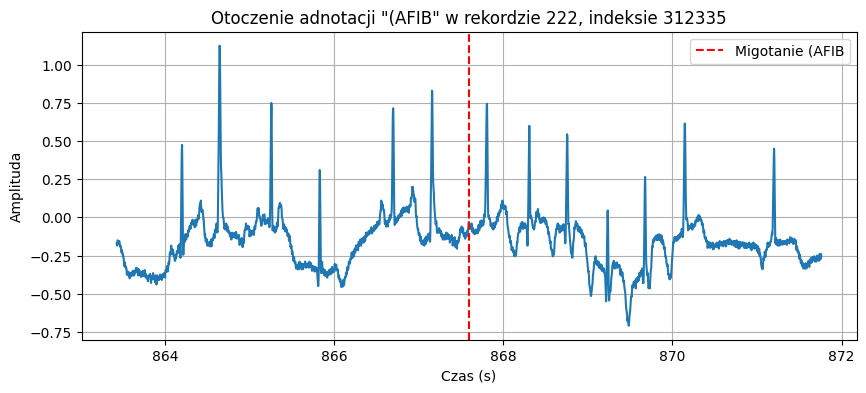

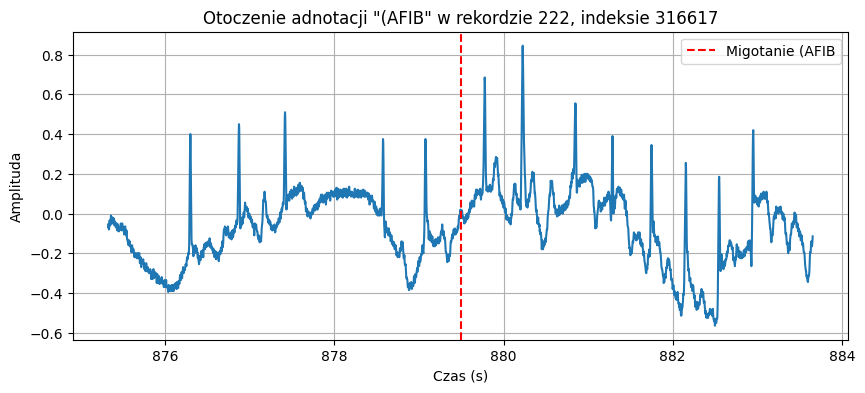

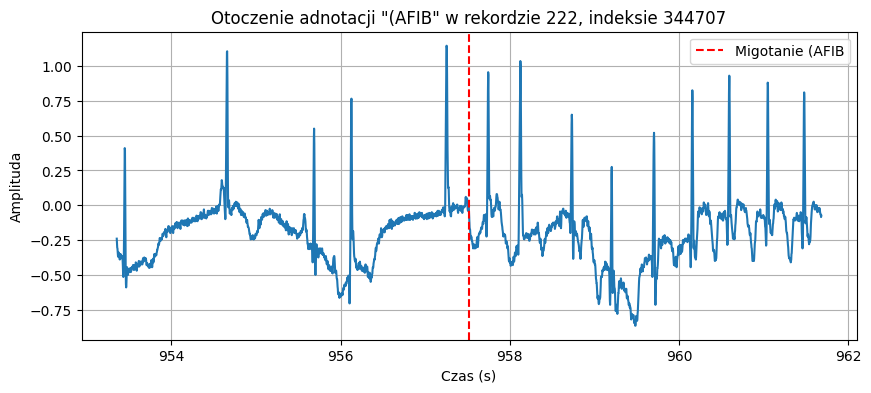

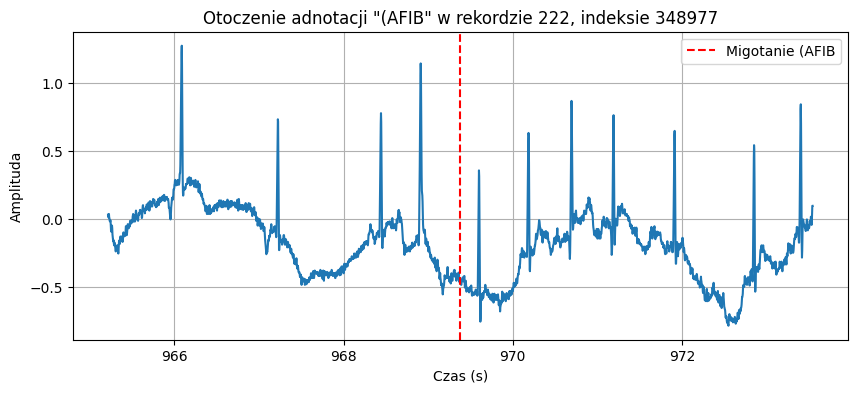

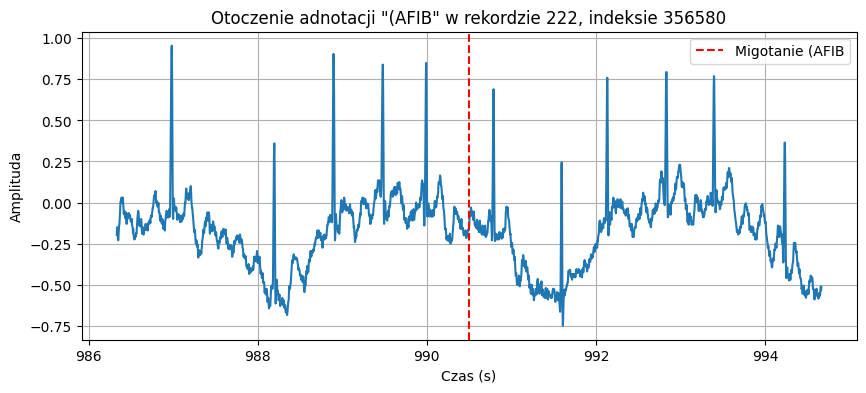

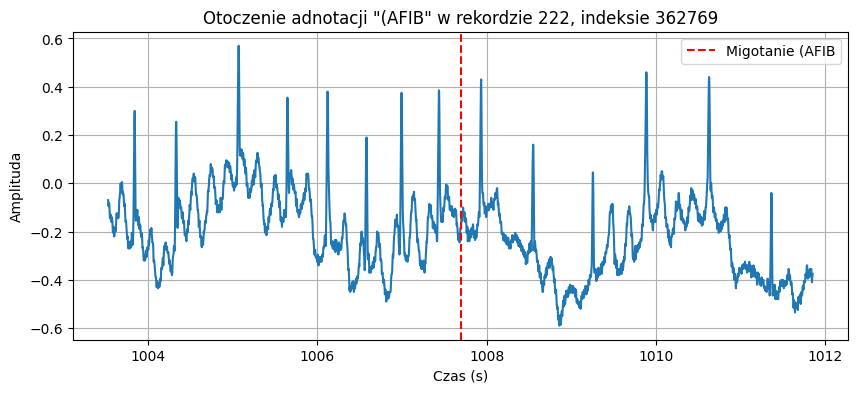

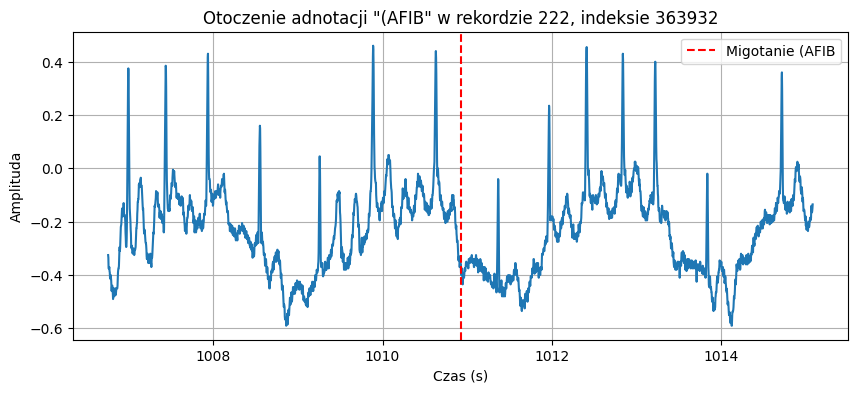

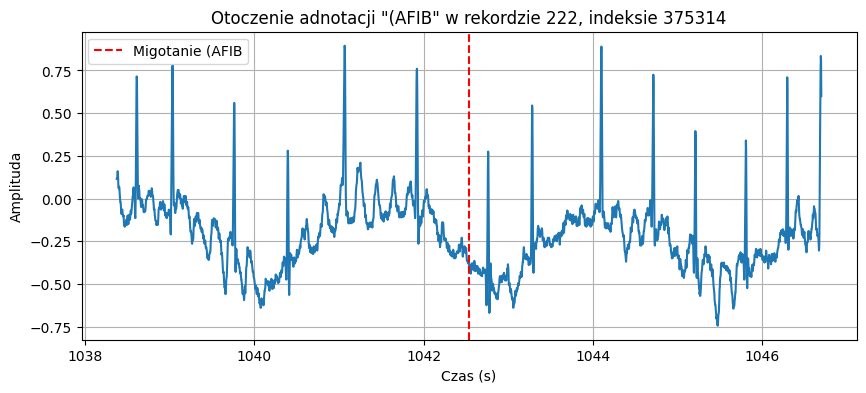

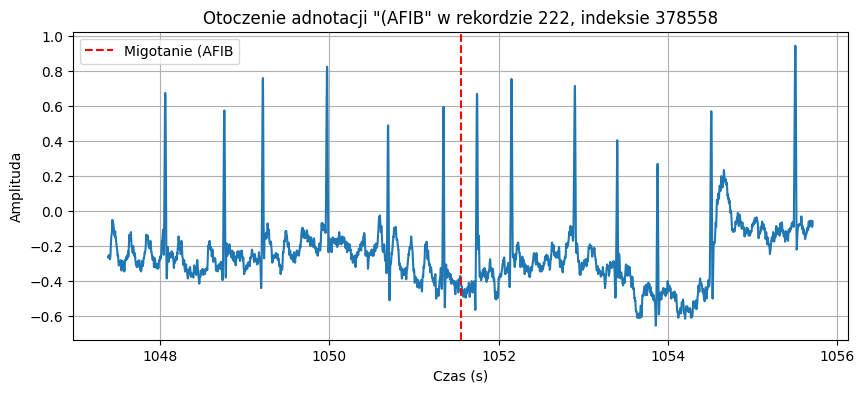

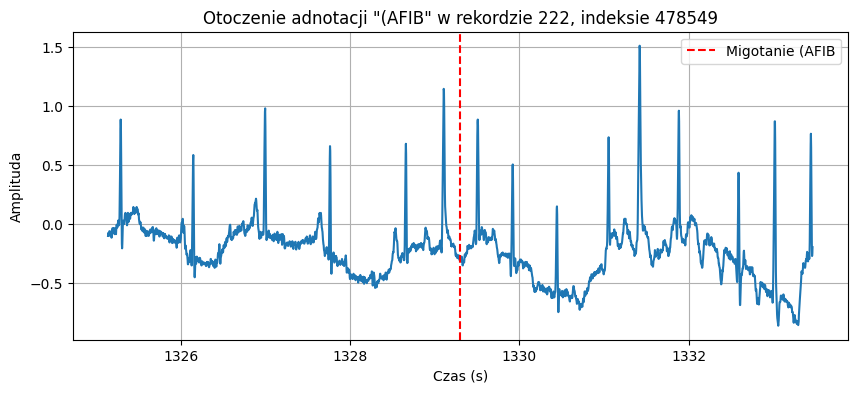

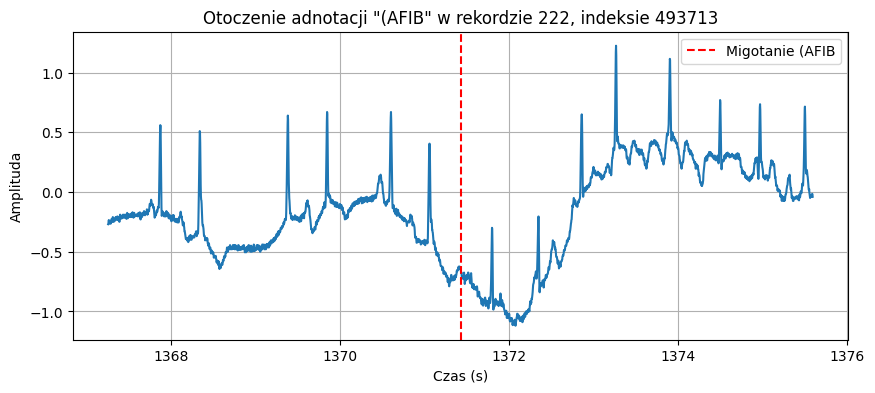

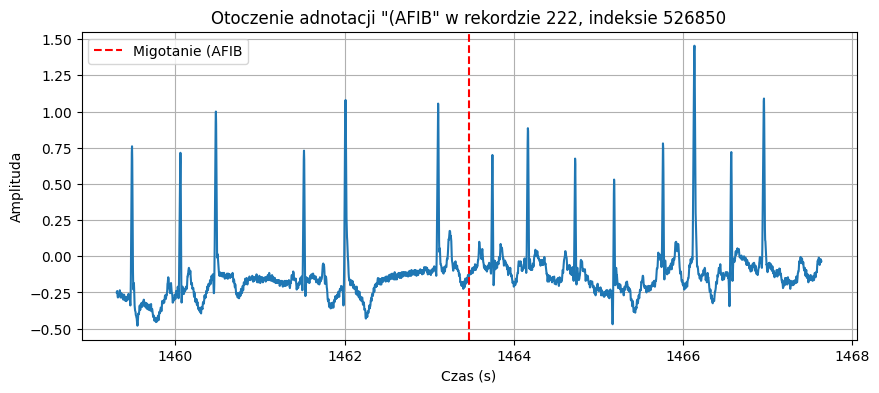

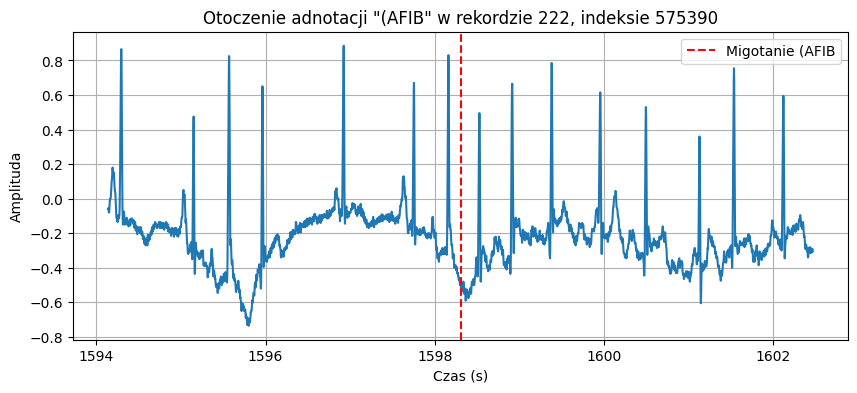

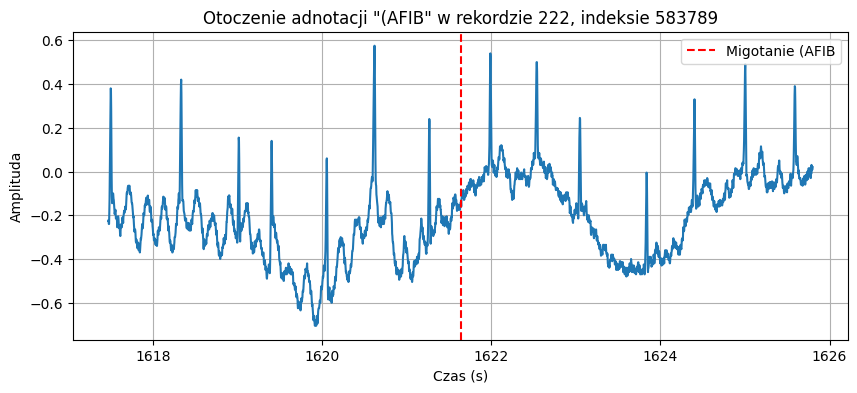

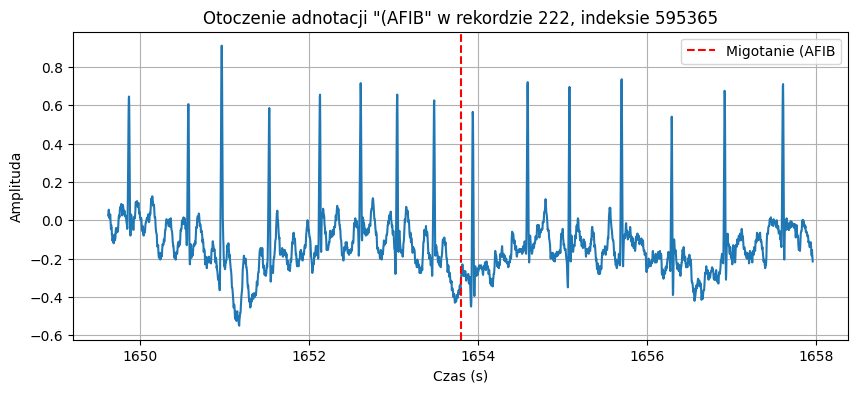

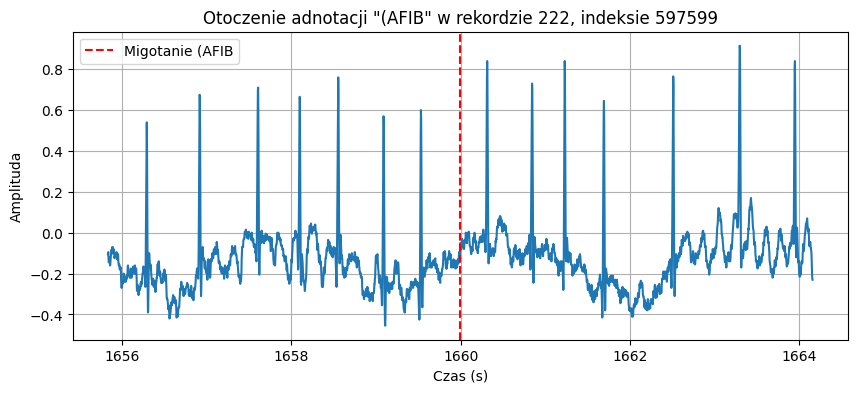

In [44]:
import wfdb
import matplotlib.pyplot as plt
import os

# Ustal parametry otoczenia do wyświetlenia
context_window = 1500  # liczba próbek do pokazania przed i po adnotacji
sampling_rate = 360  # częstość próbkowania w Hz

# Przechodzenie przez pliki w katalogu
for record_file in os.listdir(data_dir):
    if record_file.endswith('.dat'):  # Upewnij się, że to plik .dat
        # Ustal nazwę rekordu bez rozszerzenia
        record_name = record_file[:-4]

        # Wczytaj rekord i adnotacje
        record = wfdb.rdrecord(os.path.join(data_dir, record_name))
        annotation = wfdb.rdann(os.path.join(data_dir, record_name), 'atr')

        # Znajdź indeksy adnotacji "F"
        f_indices = [i for i, sym in enumerate(annotation.aux_note) if '(AFIB' in sym]

        # Jeśli znajdziesz adnotację "F", wyświetl otoczenie
        if f_indices:
            for idx in f_indices:
                # Indeks adnotacji
                ann_index = annotation.sample[idx]

                # Ustal indeksy otoczenia
                start = max(0, ann_index - context_window)
                end = min(len(record.p_signal), ann_index + context_window)

                # Wyciągnij otoczenie sygnału
                segment = record.p_signal[start:end, 0]

                # Oblicz czas w sekundach dla osi X
                time = np.arange(start, end) / sampling_rate

                # Wyświetl segment
                plt.figure(figsize=(10, 4))
                plt.plot(time, segment)
                plt.axvline(x=ann_index / sampling_rate, color='r', linestyle='--', label='Migotanie (AFIB')  # Zaznaczenie F
                plt.title(f'Otoczenie adnotacji "(AFIB" w rekordzie {record_name}, indeksie {ann_index}')
                plt.xlabel('Czas (s)')
                plt.ylabel('Amplituda')
                plt.grid()
                plt.legend()
                plt.show()

            # Jeśli chcesz zatrzymać przeszukiwanie po znalezieniu pierwszej adnotacji "F", odkomentuj poniższą linię:
